# Possible Approach

## Hypothesis, does adding Pos, Neg, and Neu values from Sentiment Analysis improve the original model??

In [36]:
import numpy as np
import pandas as pd
import os
os.chdir('C:\\Users\\v-paszaf\\Desktop')
df = pd.read_csv('moviereviews.tsv', sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [40]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
df.dropna(inplace=True)

blanks = []  # start with an empty list

for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

df.drop(blanks, inplace=True)

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [42]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [43]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [44]:
df.head()

,label,review,scores
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co..."
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com..."
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.067, 'neu': 0.783, 'pos': 0.15, 'com..."
3,pos,according to hollywood movies made in last few...,"{'neg': 0.069, 'neu': 0.786, 'pos': 0.145, 'co..."
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.09, 'neu': 0.822, 'pos': 0.088, 'com..."


In [45]:
df['positive'] = df['scores'].apply(lambda score_dict: score_dict['pos'])
df['negative'] = df['scores'].apply(lambda score_dict: score_dict['neg'])
df['neutral'] = df['scores'].apply(lambda score_dict: score_dict['neu'])
df['compound']  =df['scores'].apply(lambda score_dict: score_dict['compound'])
df['count_words'] = df['review'].apply(lambda x: len(x))
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [46]:
df.head()

,label,review,scores,positive,negative,neutral,compound,count_words,comp_score
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",0.101,0.121,0.778,-0.9125,2250,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",0.105,0.120,0.775,-0.8618,3503,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.067, 'neu': 0.783, 'pos': 0.15, 'com...",0.150,0.067,0.783,0.9953,3869,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.069, 'neu': 0.786, 'pos': 0.145, 'co...",0.145,0.069,0.786,0.9972,5584,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.09, 'neu': 0.822, 'pos': 0.088, 'com...",0.088,0.090,0.822,-0.7264,4327,neg


In [33]:
print(df.iloc[15]['review'])

here's a rarity : a children's film that attempts to tackle a weighty subject , is there a god ? 
done well , it could have been a gem among the wasteland of modern children's cinema . 
unfortunately , it isn't . 
with jumbled messages , and an unclear audience , wide awake was better left asleep . 
fifth grader joshua beal ( joseph cross ) is in the middle of a moral crisis . 
his beloved grandfather ( robert loggia ) has died , and joshua has begun a quest . 
he wants to find god , to discover why bad things happen . 
this religious quest is slightly disturbing for his parents ( dana delany and denis leary ) , but they do their best to cope with their son as he explores different religious faiths . 
at his catholic school , his favorite teacher , sister terry ( rosie o'donnell ) , tries to give him guidance , but this is a journey he must make on his own . 
meanwhile , he is having the most momentous year of his life . 
he has several adventures with his daredevil best friend dave ( 

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [48]:
accuracy_score(df['label'],df['comp_score'])

0.6367389060887513

In [49]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938



In [50]:
df['label'].unique()

array(['neg', 'pos'], dtype=object)

In [51]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
y = le.fit_transform(df['label'])

In [55]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [56]:
df.head()

,label,review,scores,positive,negative,neutral,compound,count_words,comp_score
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",0.101,0.121,0.778,-0.9125,2250,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",0.105,0.120,0.775,-0.8618,3503,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.067, 'neu': 0.783, 'pos': 0.15, 'com...",0.150,0.067,0.783,0.9953,3869,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.069, 'neu': 0.786, 'pos': 0.145, 'co...",0.145,0.069,0.786,0.9972,5584,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.09, 'neu': 0.822, 'pos': 0.088, 'com...",0.088,0.090,0.822,-0.7264,4327,neg


In [90]:
X = df.iloc[:, 3:-1].values

In [65]:
X

array([[ 1.010e-01,  1.210e-01,  7.780e-01, -9.125e-01,  2.250e+03],
       [ 1.050e-01,  1.200e-01,  7.750e-01, -8.618e-01,  3.503e+03],
       [ 1.500e-01,  6.700e-02,  7.830e-01,  9.953e-01,  3.869e+03],
       ...,
       [ 1.450e-01,  1.500e-01,  7.050e-01, -7.564e-01,  5.010e+03],
       [ 1.600e-01,  1.290e-01,  7.110e-01,  9.489e-01,  3.424e+03],
       [ 1.880e-01,  7.100e-02,  7.410e-01,  9.981e-01,  4.049e+03]])

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc =StandardScaler()

In [91]:
X = sc.fit_transform(X)

In [92]:
X

array([[-0.87855452,  0.50970185,  0.33585551, -1.53084314, -0.96754439],
       [-0.78104776,  0.48404398,  0.27354175, -1.47102787, -0.22828897],
       [ 0.31590329, -0.87582292,  0.43971178,  0.71995716, -0.01235322],
       ...,
       [ 0.19401984,  1.25377997, -1.18044595, -1.34667817,  0.6608235 ],
       [ 0.55967019,  0.71496478, -1.05581843,  0.66521498, -0.27489805],
       [ 1.24221751, -0.77319145, -0.43268085,  0.72326057,  0.09384468]])

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
def models():
    return [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Extra Trees', ExtraTreesClassifier()),
        ('XGboost', GradientBoostingClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('SVC', SVC()),
        ('AdaBoost', AdaBoostClassifier()),
        ('KNN', KNeighborsClassifier())
    ]

In [70]:
def plot_result(model_name, result, ylim=(0, 1.)):
    mean_train = np.round( np.mean(result['train_score']), 2)
    mean_test = np.round( np.mean(result['test_score']), 2)
    
    plt.title('{0}: cross validation\nmean-train-acc:{1}\nmean-test-acc:{2}'.format(model_name, mean_train, mean_test))
    plt.plot( result['train_score'], 'r-o', label="train" )
    plt.plot( result['test_score'], 'g-o', label="test" )
    plt.legend(loc='best')
    plt.ylabel('Accuracy')
    plt.xlabel('# of fold')
    plt.ylim(*ylim)
    plt.show()

C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression


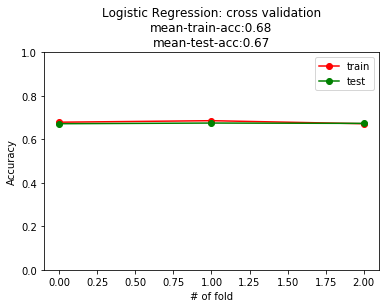

Decision Tree


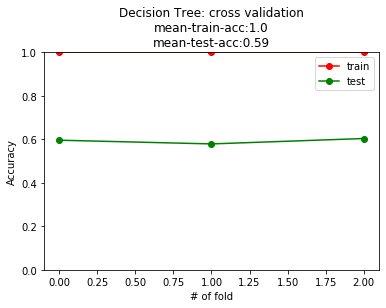

C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest


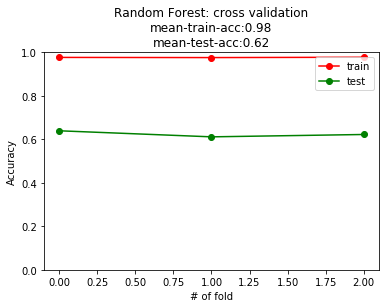

C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Extra Trees


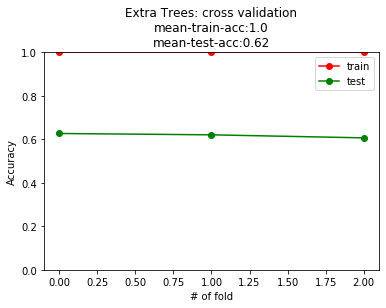

XGboost


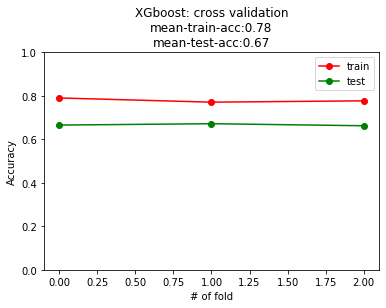

Naive Bayes


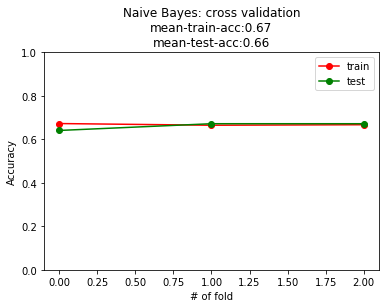

C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 

SVC


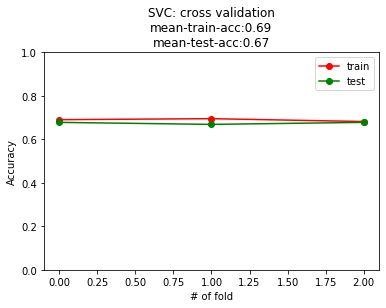

AdaBoost


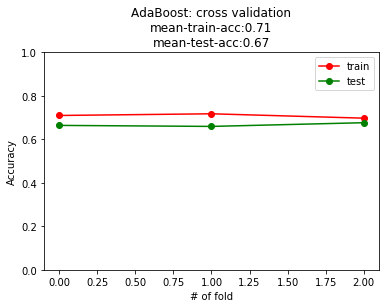

KNN


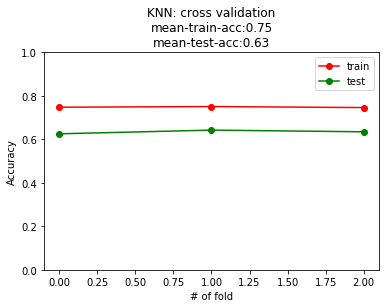

In [71]:
for model_name, model in models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=3, return_estimator=True, return_train_score= True)
    print(model_name)

    plot_result(model_name, result)

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers

Using TensorFlow backend.


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [99]:
X.shape

(1938, 5)

In [96]:
y.shape

(1938,)

In [101]:
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(Adam(lr=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])
keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
result = model.evaluate(X_test, y_test)

W0805 13:02:04.238188 24668 deprecation.py:323] From C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 13:02:04.277188 24668 deprecation_wrapper.py:119] From C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



640/640 [==============================] - 1s 922us/step


In [102]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 32)                192       
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 33        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [103]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.1)

Train on 1168 samples, validate on 130 samples
Epoch 1/200
1168/1168 [==============================] - 1s 469us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 2/200
1168/1168 [==============================] - 0s 96us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 3/200
1168/1168 [==============================] - 0s 110us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 4/200
1168/1168 [==============================] - 0s 91us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 5/200
1168/1168 [==============================] - 0s 71us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 6/200
1168/1168 [==============================] - 0s 125us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 7/200
1168/1168 [==============================] - 0s 102us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.47

1168/1168 [==============================] - 0s 91us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 61/200
1168/1168 [==============================] - 0s 80us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 62/200
1168/1168 [==============================] - 0s 76us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 63/200
1168/1168 [==============================] - 0s 63us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 64/200
1168/1168 [==============================] - 0s 86us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 65/200
1168/1168 [==============================] - 0s 65us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 66/200
1168/1168 [==============================] - 0s 92us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 67/200
1168/1168 [==============================

Epoch 120/200
1168/1168 [==============================] - 0s 48us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 121/200
1168/1168 [==============================] - 0s 64us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 122/200
1168/1168 [==============================] - 0s 51us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 123/200
1168/1168 [==============================] - 0s 51us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 124/200
1168/1168 [==============================] - 0s 62us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 125/200
1168/1168 [==============================] - 0s 72us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 126/200
1168/1168 [==============================] - 0s 82us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 127/200
1168/1168 [=========

1168/1168 [==============================] - 0s 71us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 180/200
1168/1168 [==============================] - 0s 77us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 181/200
1168/1168 [==============================] - 0s 72us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 182/200
1168/1168 [==============================] - 0s 92us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 183/200
1168/1168 [==============================] - 0s 80us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 184/200
1168/1168 [==============================] - 0s 94us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 185/200
1168/1168 [==============================] - 0s 92us/step - loss: 8.0940 - acc: 0.4923 - val_loss: 8.3391 - val_acc: 0.4769
Epoch 186/200
1168/1168 [=======================

In [104]:
def build_logistic_regression_model():
  model = Sequential()
  model.add(Dense(32, input_shape= (X.shape[1],), activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy']),
  keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=2)
  result = model.evaluate(X_test, y_test)
  return model

In [105]:
model = KerasClassifier(
                        build_fn=build_logistic_regression_model,
                        epochs=1000, verbose=2,
                      )

In [133]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.1)

640/640 [==============================] - 1s 932us/step
Train on 1168 samples, validate on 130 samples
Epoch 1/200
1168/1168 [==============================] - 1s 605us/step - loss: 0.6601 - acc: 0.6259 - val_loss: 0.6646 - val_acc: 0.6308
Epoch 2/200
1168/1168 [==============================] - 0s 81us/step - loss: 0.6194 - acc: 0.6789 - val_loss: 0.7213 - val_acc: 0.5385
Epoch 3/200
1168/1168 [==============================] - 0s 72us/step - loss: 0.6186 - acc: 0.6729 - val_loss: 0.6809 - val_acc: 0.6385
Epoch 4/200
1168/1168 [==============================] - 0s 46us/step - loss: 0.6009 - acc: 0.6841 - val_loss: 0.7262 - val_acc: 0.6154
Epoch 5/200
1168/1168 [==============================] - 0s 76us/step - loss: 0.6058 - acc: 0.6824 - val_loss: 0.6796 - val_acc: 0.6000
Epoch 6/200
1168/1168 [==============================] - 0s 78us/step - loss: 0.6033 - acc: 0.6729 - val_loss: 0.6654 - val_acc: 0.6077
Epoch 7/200
1168/1168 [==============================] - 0s 59us/step - loss: 0

1168/1168 [==============================] - 0s 116us/step - loss: 0.6008 - acc: 0.6781 - val_loss: 0.6677 - val_acc: 0.6462
Epoch 60/200
1168/1168 [==============================] - 0s 113us/step - loss: 0.5951 - acc: 0.6849 - val_loss: 0.6828 - val_acc: 0.6308
Epoch 61/200
1168/1168 [==============================] - 0s 83us/step - loss: 0.5962 - acc: 0.6841 - val_loss: 0.6549 - val_acc: 0.6154
Epoch 62/200
1168/1168 [==============================] - 0s 89us/step - loss: 0.5917 - acc: 0.6858 - val_loss: 0.6544 - val_acc: 0.6000
Epoch 63/200
1168/1168 [==============================] - 0s 120us/step - loss: 0.5915 - acc: 0.6832 - val_loss: 0.6618 - val_acc: 0.6077
Epoch 64/200
1168/1168 [==============================] - 0s 129us/step - loss: 0.5908 - acc: 0.6866 - val_loss: 0.6595 - val_acc: 0.6308
Epoch 65/200
1168/1168 [==============================] - 0s 77us/step - loss: 0.6056 - acc: 0.6866 - val_loss: 0.6562 - val_acc: 0.6538
Epoch 66/200
1168/1168 [==========================

Epoch 119/200
1168/1168 [==============================] - 0s 65us/step - loss: 0.5826 - acc: 0.7055 - val_loss: 0.7122 - val_acc: 0.5462
Epoch 120/200
1168/1168 [==============================] - ETA: 0s - loss: 0.6028 - acc: 0.662 - 0s 74us/step - loss: 0.5917 - acc: 0.6764 - val_loss: 0.6690 - val_acc: 0.6231
Epoch 121/200
1168/1168 [==============================] - 0s 86us/step - loss: 0.5899 - acc: 0.6875 - val_loss: 0.6454 - val_acc: 0.6462
Epoch 122/200
1168/1168 [==============================] - 0s 81us/step - loss: 0.5887 - acc: 0.6961 - val_loss: 0.6442 - val_acc: 0.6308
Epoch 123/200
1168/1168 [==============================] - 0s 79us/step - loss: 0.5951 - acc: 0.6858 - val_loss: 0.6505 - val_acc: 0.6231
Epoch 124/200
1168/1168 [==============================] - 0s 57us/step - loss: 0.5879 - acc: 0.6892 - val_loss: 0.6507 - val_acc: 0.6462
Epoch 125/200
1168/1168 [==============================] - 0s 48us/step - loss: 0.5858 - acc: 0.6943 - val_loss: 0.6508 - val_acc: 0.6

Epoch 178/200
1168/1168 [==============================] - 0s 61us/step - loss: 0.5854 - acc: 0.6952 - val_loss: 0.6684 - val_acc: 0.6308
Epoch 179/200
1168/1168 [==============================] - 0s 55us/step - loss: 0.5867 - acc: 0.6935 - val_loss: 0.6473 - val_acc: 0.6231
Epoch 180/200
1168/1168 [==============================] - 0s 57us/step - loss: 0.5822 - acc: 0.6901 - val_loss: 0.6508 - val_acc: 0.6538
Epoch 181/200
1168/1168 [==============================] - 0s 58us/step - loss: 0.5856 - acc: 0.6909 - val_loss: 0.6606 - val_acc: 0.6231
Epoch 182/200
1168/1168 [==============================] - 0s 87us/step - loss: 0.5846 - acc: 0.6952 - val_loss: 0.6446 - val_acc: 0.6462
Epoch 183/200
1168/1168 [==============================] - 0s 121us/step - loss: 0.5790 - acc: 0.6952 - val_loss: 0.6448 - val_acc: 0.6231
Epoch 184/200
1168/1168 [==============================] - 0s 84us/step - loss: 0.5876 - acc: 0.6841 - val_loss: 0.6949 - val_acc: 0.5462
Epoch 185/200
1168/1168 [========

In [134]:
predictions = model.predict(X_test)

In [135]:
from sklearn.metrics import confusion_matrix, classification_report

In [136]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       308
           1       0.74      0.64      0.68       332

    accuracy                           0.69       640
   macro avg       0.70      0.70      0.69       640
weighted avg       0.70      0.69      0.69       640



[[232  76]
 [120 212]]


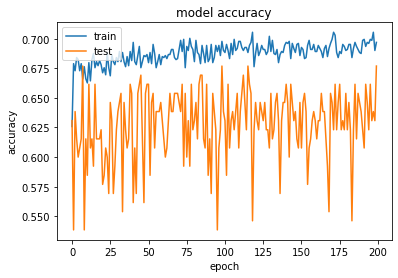

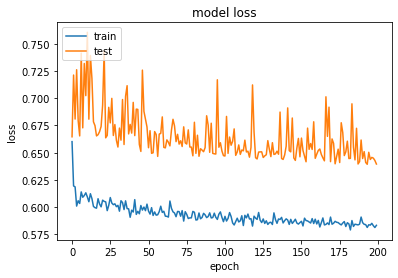

In [138]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [109]:
from sklearn.model_selection import cross_val_score, KFold

In [110]:
cv = KFold(5, shuffle=True)

In [111]:
scores = cross_val_score(model, X_train, y_train, cv=cv)

640/640 [==============================] - 0s 323us/step
Epoch 1/1000
 - 0s - loss: 0.6643 - acc: 0.5829
Epoch 2/1000
 - 0s - loss: 0.6239 - acc: 0.6484
Epoch 3/1000
 - 0s - loss: 0.6197 - acc: 0.6493
Epoch 4/1000
 - 0s - loss: 0.6228 - acc: 0.6590
Epoch 5/1000
 - 0s - loss: 0.6213 - acc: 0.6676
Epoch 6/1000
 - 0s - loss: 0.6140 - acc: 0.6686
Epoch 7/1000
 - 0s - loss: 0.6172 - acc: 0.6715
Epoch 8/1000
 - 0s - loss: 0.6151 - acc: 0.6657
Epoch 9/1000
 - 0s - loss: 0.6236 - acc: 0.6696
Epoch 10/1000
 - 0s - loss: 0.6257 - acc: 0.6667
Epoch 11/1000
 - 0s - loss: 0.6153 - acc: 0.6734
Epoch 12/1000
 - 0s - loss: 0.6110 - acc: 0.6879
Epoch 13/1000
 - 0s - loss: 0.6112 - acc: 0.6773
Epoch 14/1000
 - 0s - loss: 0.6078 - acc: 0.6811
Epoch 15/1000
 - 0s - loss: 0.6116 - acc: 0.6686
Epoch 16/1000
 - 0s - loss: 0.6162 - acc: 0.6667
Epoch 17/1000
 - 0s - loss: 0.6198 - acc: 0.6628
Epoch 18/1000
 - 0s - loss: 0.6116 - acc: 0.6821
Epoch 19/1000
 - 0s - loss: 0.6165 - acc: 0.6782
Epoch 20/1000
 - 0s -

Epoch 166/1000
 - 0s - loss: 0.5961 - acc: 0.6782
Epoch 167/1000
 - 0s - loss: 0.5890 - acc: 0.6898
Epoch 168/1000
 - 0s - loss: 0.5973 - acc: 0.6840
Epoch 169/1000
 - 0s - loss: 0.5914 - acc: 0.6811
Epoch 170/1000
 - 0s - loss: 0.5856 - acc: 0.6869
Epoch 171/1000
 - 0s - loss: 0.5896 - acc: 0.6946
Epoch 172/1000
 - 0s - loss: 0.5809 - acc: 0.6946
Epoch 173/1000
 - 0s - loss: 0.5919 - acc: 0.6830
Epoch 174/1000
 - 0s - loss: 0.5881 - acc: 0.7013
Epoch 175/1000
 - 0s - loss: 0.5874 - acc: 0.6908
Epoch 176/1000
 - 0s - loss: 0.5869 - acc: 0.6908
Epoch 177/1000
 - 0s - loss: 0.5863 - acc: 0.6859
Epoch 178/1000
 - 0s - loss: 0.5899 - acc: 0.6908
Epoch 179/1000
 - 0s - loss: 0.5915 - acc: 0.6802
Epoch 180/1000
 - 0s - loss: 0.5872 - acc: 0.6859
Epoch 181/1000
 - 0s - loss: 0.5901 - acc: 0.6821
Epoch 182/1000
 - 0s - loss: 0.5897 - acc: 0.6898
Epoch 183/1000
 - 0s - loss: 0.5904 - acc: 0.6927
Epoch 184/1000
 - 0s - loss: 0.5864 - acc: 0.6869
Epoch 185/1000
 - 0s - loss: 0.5823 - acc: 0.6898


Epoch 330/1000
 - 0s - loss: 0.5702 - acc: 0.6927
Epoch 331/1000
 - 0s - loss: 0.5656 - acc: 0.6850
Epoch 332/1000
 - 0s - loss: 0.5711 - acc: 0.6946
Epoch 333/1000
 - 0s - loss: 0.5682 - acc: 0.6917
Epoch 334/1000
 - 0s - loss: 0.5690 - acc: 0.6975
Epoch 335/1000
 - 0s - loss: 0.5660 - acc: 0.6975
Epoch 336/1000
 - 0s - loss: 0.5666 - acc: 0.6898
Epoch 337/1000
 - 0s - loss: 0.5724 - acc: 0.6917
Epoch 338/1000
 - 0s - loss: 0.5679 - acc: 0.6869
Epoch 339/1000
 - 0s - loss: 0.5686 - acc: 0.6975
Epoch 340/1000
 - 0s - loss: 0.5699 - acc: 0.6965
Epoch 341/1000
 - 0s - loss: 0.5680 - acc: 0.6946
Epoch 342/1000
 - 0s - loss: 0.5736 - acc: 0.6879
Epoch 343/1000
 - 0s - loss: 0.5697 - acc: 0.6927
Epoch 344/1000
 - 0s - loss: 0.5709 - acc: 0.6879
Epoch 345/1000
 - 0s - loss: 0.5685 - acc: 0.6927
Epoch 346/1000
 - 0s - loss: 0.5702 - acc: 0.6917
Epoch 347/1000
 - 0s - loss: 0.5648 - acc: 0.7004
Epoch 348/1000
 - 0s - loss: 0.5701 - acc: 0.6888
Epoch 349/1000
 - 0s - loss: 0.5656 - acc: 0.6946


Epoch 494/1000
 - 0s - loss: 0.5603 - acc: 0.7052
Epoch 495/1000
 - 0s - loss: 0.5612 - acc: 0.7091
Epoch 496/1000
 - 0s - loss: 0.5652 - acc: 0.6869
Epoch 497/1000
 - 0s - loss: 0.5635 - acc: 0.7013
Epoch 498/1000
 - 0s - loss: 0.5613 - acc: 0.6975
Epoch 499/1000
 - 0s - loss: 0.5620 - acc: 0.7052
Epoch 500/1000
 - 0s - loss: 0.5607 - acc: 0.7110
Epoch 501/1000
 - 0s - loss: 0.5652 - acc: 0.6946
Epoch 502/1000
 - 0s - loss: 0.5585 - acc: 0.6985
Epoch 503/1000
 - 0s - loss: 0.5613 - acc: 0.6927
Epoch 504/1000
 - 0s - loss: 0.5640 - acc: 0.6927
Epoch 505/1000
 - 0s - loss: 0.5648 - acc: 0.6975
Epoch 506/1000
 - 0s - loss: 0.5631 - acc: 0.6869
Epoch 507/1000
 - 0s - loss: 0.5648 - acc: 0.6850
Epoch 508/1000
 - 0s - loss: 0.5625 - acc: 0.7004
Epoch 509/1000
 - 0s - loss: 0.5654 - acc: 0.6956
Epoch 510/1000
 - 0s - loss: 0.5625 - acc: 0.6985
Epoch 511/1000
 - 0s - loss: 0.5651 - acc: 0.6936
Epoch 512/1000
 - 0s - loss: 0.5617 - acc: 0.6975
Epoch 513/1000
 - 0s - loss: 0.5638 - acc: 0.6975


Epoch 658/1000
 - 0s - loss: 0.5584 - acc: 0.6975
Epoch 659/1000
 - 0s - loss: 0.5625 - acc: 0.6840
Epoch 660/1000
 - 0s - loss: 0.5586 - acc: 0.6946
Epoch 661/1000
 - 0s - loss: 0.5613 - acc: 0.6946
Epoch 662/1000
 - 0s - loss: 0.5611 - acc: 0.6985
Epoch 663/1000
 - 0s - loss: 0.5611 - acc: 0.7013
Epoch 664/1000
 - 0s - loss: 0.5585 - acc: 0.6975
Epoch 665/1000
 - 0s - loss: 0.5553 - acc: 0.7023
Epoch 666/1000
 - 0s - loss: 0.5595 - acc: 0.6908
Epoch 667/1000
 - 0s - loss: 0.5609 - acc: 0.7023
Epoch 668/1000
 - 0s - loss: 0.5575 - acc: 0.6965
Epoch 669/1000
 - 0s - loss: 0.5587 - acc: 0.6975
Epoch 670/1000
 - 0s - loss: 0.5599 - acc: 0.6985
Epoch 671/1000
 - 0s - loss: 0.5616 - acc: 0.6869
Epoch 672/1000
 - 0s - loss: 0.5608 - acc: 0.6985
Epoch 673/1000
 - 0s - loss: 0.5618 - acc: 0.6985
Epoch 674/1000
 - 0s - loss: 0.5629 - acc: 0.6840
Epoch 675/1000
 - 0s - loss: 0.5565 - acc: 0.6956
Epoch 676/1000
 - 0s - loss: 0.5626 - acc: 0.7042
Epoch 677/1000
 - 0s - loss: 0.5629 - acc: 0.6879


Epoch 822/1000
 - 0s - loss: 0.5549 - acc: 0.6879
Epoch 823/1000
 - 0s - loss: 0.5534 - acc: 0.6985
Epoch 824/1000
 - 0s - loss: 0.5544 - acc: 0.7023
Epoch 825/1000
 - 0s - loss: 0.5564 - acc: 0.7081
Epoch 826/1000
 - 0s - loss: 0.5580 - acc: 0.6898
Epoch 827/1000
 - 0s - loss: 0.5538 - acc: 0.7071
Epoch 828/1000
 - 0s - loss: 0.5582 - acc: 0.6898
Epoch 829/1000
 - 0s - loss: 0.5544 - acc: 0.7023
Epoch 830/1000
 - 0s - loss: 0.5525 - acc: 0.7033
Epoch 831/1000
 - 0s - loss: 0.5531 - acc: 0.6994
Epoch 832/1000
 - 0s - loss: 0.5581 - acc: 0.6936
Epoch 833/1000
 - 0s - loss: 0.5617 - acc: 0.6869
Epoch 834/1000
 - 0s - loss: 0.5569 - acc: 0.6946
Epoch 835/1000
 - 0s - loss: 0.5560 - acc: 0.6994
Epoch 836/1000
 - 0s - loss: 0.5534 - acc: 0.7023
Epoch 837/1000
 - 0s - loss: 0.5545 - acc: 0.7023
Epoch 838/1000
 - 0s - loss: 0.5604 - acc: 0.6927
Epoch 839/1000
 - 0s - loss: 0.5569 - acc: 0.6956
Epoch 840/1000
 - 0s - loss: 0.5563 - acc: 0.6927
Epoch 841/1000
 - 0s - loss: 0.5561 - acc: 0.7071


Epoch 986/1000
 - 0s - loss: 0.5504 - acc: 0.7013
Epoch 987/1000
 - 0s - loss: 0.5531 - acc: 0.7004
Epoch 988/1000
 - 0s - loss: 0.5499 - acc: 0.7013
Epoch 989/1000
 - 0s - loss: 0.5513 - acc: 0.7023
Epoch 990/1000
 - 0s - loss: 0.5536 - acc: 0.7042
Epoch 991/1000
 - 0s - loss: 0.5500 - acc: 0.6965
Epoch 992/1000
 - 0s - loss: 0.5537 - acc: 0.6975
Epoch 993/1000
 - 0s - loss: 0.5512 - acc: 0.6936
Epoch 994/1000
 - 0s - loss: 0.5523 - acc: 0.7062
Epoch 995/1000
 - 0s - loss: 0.5492 - acc: 0.6888
Epoch 996/1000
 - 0s - loss: 0.5468 - acc: 0.7062
Epoch 997/1000
 - 0s - loss: 0.5547 - acc: 0.6850
Epoch 998/1000
 - 0s - loss: 0.5517 - acc: 0.7023
Epoch 999/1000
 - 0s - loss: 0.5494 - acc: 0.6908
Epoch 1000/1000
 - 0s - loss: 0.5503 - acc: 0.6994
640/640 [==============================] - 0s 394us/step
Epoch 1/1000
 - 0s - loss: 0.6786 - acc: 0.6012
Epoch 2/1000
 - 0s - loss: 0.6360 - acc: 0.6435
Epoch 3/1000
 - 0s - loss: 0.6266 - acc: 0.6541
Epoch 4/1000
 - 0s - loss: 0.6212 - acc: 0.6676


Epoch 151/1000
 - 0s - loss: 0.5961 - acc: 0.6821
Epoch 152/1000
 - 0s - loss: 0.5999 - acc: 0.6830
Epoch 153/1000
 - 0s - loss: 0.6037 - acc: 0.6773
Epoch 154/1000
 - 0s - loss: 0.6038 - acc: 0.6715
Epoch 155/1000
 - 0s - loss: 0.6007 - acc: 0.6724
Epoch 156/1000
 - 0s - loss: 0.6012 - acc: 0.6763
Epoch 157/1000
 - 0s - loss: 0.5945 - acc: 0.6898
Epoch 158/1000
 - 0s - loss: 0.6042 - acc: 0.6744
Epoch 159/1000
 - 0s - loss: 0.6029 - acc: 0.6676
Epoch 160/1000
 - 0s - loss: 0.6006 - acc: 0.6811
Epoch 161/1000
 - 0s - loss: 0.6011 - acc: 0.6734
Epoch 162/1000
 - 0s - loss: 0.6018 - acc: 0.6628
Epoch 163/1000
 - 0s - loss: 0.6058 - acc: 0.6657
Epoch 164/1000
 - 0s - loss: 0.6006 - acc: 0.6792
Epoch 165/1000
 - 0s - loss: 0.5985 - acc: 0.6830
Epoch 166/1000
 - 0s - loss: 0.5969 - acc: 0.6744
Epoch 167/1000
 - 0s - loss: 0.6022 - acc: 0.6744
Epoch 168/1000
 - 0s - loss: 0.5967 - acc: 0.6773
Epoch 169/1000
 - 0s - loss: 0.6018 - acc: 0.6850
Epoch 170/1000
 - 0s - loss: 0.6014 - acc: 0.6628


Epoch 315/1000
 - 0s - loss: 0.5898 - acc: 0.6946
Epoch 316/1000
 - 0s - loss: 0.5967 - acc: 0.6859
Epoch 317/1000
 - 0s - loss: 0.5898 - acc: 0.6744
Epoch 318/1000
 - 0s - loss: 0.5929 - acc: 0.6782
Epoch 319/1000
 - 0s - loss: 0.5898 - acc: 0.6802
Epoch 320/1000
 - 0s - loss: 0.5900 - acc: 0.6869
Epoch 321/1000
 - 0s - loss: 0.5938 - acc: 0.6859
Epoch 322/1000
 - 0s - loss: 0.5911 - acc: 0.6840
Epoch 323/1000
 - 0s - loss: 0.5922 - acc: 0.6859
Epoch 324/1000
 - 0s - loss: 0.5925 - acc: 0.6879
Epoch 325/1000
 - 0s - loss: 0.5933 - acc: 0.6802
Epoch 326/1000
 - 0s - loss: 0.5924 - acc: 0.6859
Epoch 327/1000
 - 0s - loss: 0.5911 - acc: 0.6917
Epoch 328/1000
 - 0s - loss: 0.5902 - acc: 0.6840
Epoch 329/1000
 - 0s - loss: 0.5902 - acc: 0.6821
Epoch 330/1000
 - 0s - loss: 0.5912 - acc: 0.6840
Epoch 331/1000
 - 0s - loss: 0.5926 - acc: 0.6811
Epoch 332/1000
 - 0s - loss: 0.5926 - acc: 0.6859
Epoch 333/1000
 - 0s - loss: 0.5913 - acc: 0.6850
Epoch 334/1000
 - 0s - loss: 0.5913 - acc: 0.6965


Epoch 479/1000
 - 0s - loss: 0.5884 - acc: 0.6792
Epoch 480/1000
 - 0s - loss: 0.5866 - acc: 0.6821
Epoch 481/1000
 - 0s - loss: 0.5890 - acc: 0.6821
Epoch 482/1000
 - 0s - loss: 0.5844 - acc: 0.6850
Epoch 483/1000
 - 0s - loss: 0.5887 - acc: 0.6744
Epoch 484/1000
 - 0s - loss: 0.5890 - acc: 0.6859
Epoch 485/1000
 - 0s - loss: 0.5861 - acc: 0.6811
Epoch 486/1000
 - 0s - loss: 0.5878 - acc: 0.6792
Epoch 487/1000
 - 0s - loss: 0.5874 - acc: 0.6869
Epoch 488/1000
 - 0s - loss: 0.5862 - acc: 0.6908
Epoch 489/1000
 - 0s - loss: 0.5893 - acc: 0.6917
Epoch 490/1000
 - 0s - loss: 0.5857 - acc: 0.6773
Epoch 491/1000
 - 0s - loss: 0.5859 - acc: 0.6763
Epoch 492/1000
 - 0s - loss: 0.5877 - acc: 0.6811
Epoch 493/1000
 - 0s - loss: 0.5898 - acc: 0.6811
Epoch 494/1000
 - 0s - loss: 0.5869 - acc: 0.6792
Epoch 495/1000
 - 0s - loss: 0.5862 - acc: 0.6879
Epoch 496/1000
 - 0s - loss: 0.5865 - acc: 0.6792
Epoch 497/1000
 - 0s - loss: 0.5881 - acc: 0.6869
Epoch 498/1000
 - 0s - loss: 0.5856 - acc: 0.6840


Epoch 643/1000
 - 0s - loss: 0.5801 - acc: 0.6898
Epoch 644/1000
 - 0s - loss: 0.5828 - acc: 0.6830
Epoch 645/1000
 - 0s - loss: 0.5841 - acc: 0.6850
Epoch 646/1000
 - 0s - loss: 0.5821 - acc: 0.6734
Epoch 647/1000
 - 0s - loss: 0.5857 - acc: 0.6830
Epoch 648/1000
 - 0s - loss: 0.5827 - acc: 0.6802
Epoch 649/1000
 - 0s - loss: 0.5859 - acc: 0.6850
Epoch 650/1000
 - 0s - loss: 0.5831 - acc: 0.6869
Epoch 651/1000
 - 0s - loss: 0.5812 - acc: 0.6898
Epoch 652/1000
 - 0s - loss: 0.5831 - acc: 0.6773
Epoch 653/1000
 - 0s - loss: 0.5821 - acc: 0.6869
Epoch 654/1000
 - 0s - loss: 0.5837 - acc: 0.6859
Epoch 655/1000
 - 0s - loss: 0.5838 - acc: 0.6869
Epoch 656/1000
 - 0s - loss: 0.5831 - acc: 0.6840
Epoch 657/1000
 - 0s - loss: 0.5824 - acc: 0.6696
Epoch 658/1000
 - 0s - loss: 0.5822 - acc: 0.6821
Epoch 659/1000
 - 0s - loss: 0.5859 - acc: 0.6821
Epoch 660/1000
 - 0s - loss: 0.5852 - acc: 0.6782
Epoch 661/1000
 - 0s - loss: 0.5838 - acc: 0.6811
Epoch 662/1000
 - 0s - loss: 0.5861 - acc: 0.6869


Epoch 807/1000
 - 0s - loss: 0.5809 - acc: 0.6763
Epoch 808/1000
 - 0s - loss: 0.5821 - acc: 0.6811
Epoch 809/1000
 - 0s - loss: 0.5813 - acc: 0.6802
Epoch 810/1000
 - 0s - loss: 0.5794 - acc: 0.6850
Epoch 811/1000
 - 0s - loss: 0.5804 - acc: 0.6792
Epoch 812/1000
 - 0s - loss: 0.5812 - acc: 0.6859
Epoch 813/1000
 - 0s - loss: 0.5808 - acc: 0.6869
Epoch 814/1000
 - 0s - loss: 0.5820 - acc: 0.6773
Epoch 815/1000
 - 0s - loss: 0.5795 - acc: 0.6744
Epoch 816/1000
 - 0s - loss: 0.5799 - acc: 0.6830
Epoch 817/1000
 - 0s - loss: 0.5789 - acc: 0.6840
Epoch 818/1000
 - 0s - loss: 0.5805 - acc: 0.6821
Epoch 819/1000
 - 0s - loss: 0.5831 - acc: 0.6792
Epoch 820/1000
 - 0s - loss: 0.5826 - acc: 0.6773
Epoch 821/1000
 - 0s - loss: 0.5814 - acc: 0.6879
Epoch 822/1000
 - 0s - loss: 0.5813 - acc: 0.6840
Epoch 823/1000
 - 0s - loss: 0.5818 - acc: 0.6792
Epoch 824/1000
 - 0s - loss: 0.5817 - acc: 0.6734
Epoch 825/1000
 - 0s - loss: 0.5803 - acc: 0.6850
Epoch 826/1000
 - 0s - loss: 0.5815 - acc: 0.6898


Epoch 971/1000
 - 0s - loss: 0.5787 - acc: 0.6811
Epoch 972/1000
 - 0s - loss: 0.5799 - acc: 0.6773
Epoch 973/1000
 - 0s - loss: 0.5780 - acc: 0.6802
Epoch 974/1000
 - 0s - loss: 0.5765 - acc: 0.6859
Epoch 975/1000
 - 0s - loss: 0.5785 - acc: 0.6802
Epoch 976/1000
 - 0s - loss: 0.5798 - acc: 0.6811
Epoch 977/1000
 - 0s - loss: 0.5784 - acc: 0.6859
Epoch 978/1000
 - 0s - loss: 0.5780 - acc: 0.6792
Epoch 979/1000
 - 0s - loss: 0.5777 - acc: 0.6840
Epoch 980/1000
 - 0s - loss: 0.5746 - acc: 0.6888
Epoch 981/1000
 - 0s - loss: 0.5789 - acc: 0.6927
Epoch 982/1000
 - 0s - loss: 0.5794 - acc: 0.6811
Epoch 983/1000
 - 0s - loss: 0.5771 - acc: 0.6715
Epoch 984/1000
 - 0s - loss: 0.5782 - acc: 0.6821
Epoch 985/1000
 - 0s - loss: 0.5808 - acc: 0.6840
Epoch 986/1000
 - 0s - loss: 0.5770 - acc: 0.6802
Epoch 987/1000
 - 0s - loss: 0.5777 - acc: 0.6879
Epoch 988/1000
 - 0s - loss: 0.5790 - acc: 0.6830
Epoch 989/1000
 - 0s - loss: 0.5784 - acc: 0.6850
Epoch 990/1000
 - 0s - loss: 0.5782 - acc: 0.6859


Epoch 136/1000
 - 0s - loss: 0.5923 - acc: 0.6782
Epoch 137/1000
 - 0s - loss: 0.5977 - acc: 0.6792
Epoch 138/1000
 - 0s - loss: 0.5937 - acc: 0.6946
Epoch 139/1000
 - 0s - loss: 0.5976 - acc: 0.6676
Epoch 140/1000
 - 0s - loss: 0.5985 - acc: 0.6715
Epoch 141/1000
 - 0s - loss: 0.6007 - acc: 0.6782
Epoch 142/1000
 - 0s - loss: 0.5972 - acc: 0.6782
Epoch 143/1000
 - 0s - loss: 0.5937 - acc: 0.6821
Epoch 144/1000
 - 0s - loss: 0.5968 - acc: 0.6744
Epoch 145/1000
 - 0s - loss: 0.5996 - acc: 0.6830
Epoch 146/1000
 - 0s - loss: 0.5952 - acc: 0.6850
Epoch 147/1000
 - 0s - loss: 0.5964 - acc: 0.6792
Epoch 148/1000
 - 0s - loss: 0.5951 - acc: 0.6763
Epoch 149/1000
 - 0s - loss: 0.5947 - acc: 0.6830
Epoch 150/1000
 - 0s - loss: 0.6006 - acc: 0.6830
Epoch 151/1000
 - 0s - loss: 0.5948 - acc: 0.6782
Epoch 152/1000
 - 0s - loss: 0.5960 - acc: 0.6898
Epoch 153/1000
 - 0s - loss: 0.6017 - acc: 0.6802
Epoch 154/1000
 - 0s - loss: 0.5967 - acc: 0.6734
Epoch 155/1000
 - 0s - loss: 0.5923 - acc: 0.6763


Epoch 300/1000
 - 0s - loss: 0.5840 - acc: 0.6744
Epoch 301/1000
 - 0s - loss: 0.5806 - acc: 0.6811
Epoch 302/1000
 - 0s - loss: 0.5829 - acc: 0.6802
Epoch 303/1000
 - 0s - loss: 0.5835 - acc: 0.6840
Epoch 304/1000
 - 0s - loss: 0.5828 - acc: 0.6744
Epoch 305/1000
 - 0s - loss: 0.5847 - acc: 0.6715
Epoch 306/1000
 - 0s - loss: 0.5821 - acc: 0.6898
Epoch 307/1000
 - 0s - loss: 0.5850 - acc: 0.6792
Epoch 308/1000
 - 0s - loss: 0.5814 - acc: 0.6898
Epoch 309/1000
 - 0s - loss: 0.5816 - acc: 0.6744
Epoch 310/1000
 - 0s - loss: 0.5787 - acc: 0.6898
Epoch 311/1000
 - 0s - loss: 0.5835 - acc: 0.6821
Epoch 312/1000
 - 0s - loss: 0.5817 - acc: 0.6927
Epoch 313/1000
 - 0s - loss: 0.5812 - acc: 0.6859
Epoch 314/1000
 - 0s - loss: 0.5811 - acc: 0.6859
Epoch 315/1000
 - 0s - loss: 0.5833 - acc: 0.6811
Epoch 316/1000
 - 0s - loss: 0.5788 - acc: 0.6840
Epoch 317/1000
 - 0s - loss: 0.5842 - acc: 0.6657
Epoch 318/1000
 - 0s - loss: 0.5829 - acc: 0.6869
Epoch 319/1000
 - 0s - loss: 0.5798 - acc: 0.6840


Epoch 464/1000
 - 0s - loss: 0.5722 - acc: 0.6946
Epoch 465/1000
 - 0s - loss: 0.5708 - acc: 0.6956
Epoch 466/1000
 - 0s - loss: 0.5694 - acc: 0.6927
Epoch 467/1000
 - 0s - loss: 0.5735 - acc: 0.6908
Epoch 468/1000
 - 0s - loss: 0.5717 - acc: 0.6850
Epoch 469/1000
 - 0s - loss: 0.5700 - acc: 0.6888
Epoch 470/1000
 - 0s - loss: 0.5683 - acc: 0.6840
Epoch 471/1000
 - 0s - loss: 0.5694 - acc: 0.6917
Epoch 472/1000
 - 0s - loss: 0.5662 - acc: 0.7013
Epoch 473/1000
 - 0s - loss: 0.5689 - acc: 0.6956
Epoch 474/1000
 - 0s - loss: 0.5712 - acc: 0.6888
Epoch 475/1000
 - 0s - loss: 0.5685 - acc: 0.6802
Epoch 476/1000
 - 0s - loss: 0.5706 - acc: 0.6956
Epoch 477/1000
 - 0s - loss: 0.5711 - acc: 0.6840
Epoch 478/1000
 - 0s - loss: 0.5721 - acc: 0.6888
Epoch 479/1000
 - 0s - loss: 0.5666 - acc: 0.6888
Epoch 480/1000
 - 0s - loss: 0.5678 - acc: 0.6936
Epoch 481/1000
 - 0s - loss: 0.5678 - acc: 0.7013
Epoch 482/1000
 - 0s - loss: 0.5687 - acc: 0.6946
Epoch 483/1000
 - 0s - loss: 0.5695 - acc: 0.6888


Epoch 628/1000
 - 0s - loss: 0.5524 - acc: 0.7071
Epoch 629/1000
 - 0s - loss: 0.5566 - acc: 0.6936
Epoch 630/1000
 - 0s - loss: 0.5552 - acc: 0.6975
Epoch 631/1000
 - 0s - loss: 0.5584 - acc: 0.7052
Epoch 632/1000
 - 0s - loss: 0.5577 - acc: 0.6985
Epoch 633/1000
 - 0s - loss: 0.5554 - acc: 0.7033
Epoch 634/1000
 - 0s - loss: 0.5564 - acc: 0.6994
Epoch 635/1000
 - 0s - loss: 0.5570 - acc: 0.7013
Epoch 636/1000
 - 0s - loss: 0.5579 - acc: 0.6975
Epoch 637/1000
 - 0s - loss: 0.5564 - acc: 0.6956
Epoch 638/1000
 - 0s - loss: 0.5547 - acc: 0.7071
Epoch 639/1000
 - 0s - loss: 0.5568 - acc: 0.6927
Epoch 640/1000
 - 0s - loss: 0.5560 - acc: 0.6994
Epoch 641/1000
 - 0s - loss: 0.5560 - acc: 0.7081
Epoch 642/1000
 - 0s - loss: 0.5569 - acc: 0.7033
Epoch 643/1000
 - 0s - loss: 0.5562 - acc: 0.6946
Epoch 644/1000
 - 0s - loss: 0.5559 - acc: 0.7033
Epoch 645/1000
 - 0s - loss: 0.5543 - acc: 0.7023
Epoch 646/1000
 - 0s - loss: 0.5572 - acc: 0.7013
Epoch 647/1000
 - 0s - loss: 0.5558 - acc: 0.6985


Epoch 792/1000
 - 0s - loss: 0.5529 - acc: 0.7091
Epoch 793/1000
 - 0s - loss: 0.5509 - acc: 0.7158
Epoch 794/1000
 - 0s - loss: 0.5513 - acc: 0.7013
Epoch 795/1000
 - 0s - loss: 0.5505 - acc: 0.7042
Epoch 796/1000
 - 0s - loss: 0.5491 - acc: 0.7139
Epoch 797/1000
 - 0s - loss: 0.5504 - acc: 0.7081
Epoch 798/1000
 - 0s - loss: 0.5493 - acc: 0.7091
Epoch 799/1000
 - 0s - loss: 0.5517 - acc: 0.7033
Epoch 800/1000
 - 0s - loss: 0.5505 - acc: 0.7110
Epoch 801/1000
 - 0s - loss: 0.5498 - acc: 0.6994
Epoch 802/1000
 - 0s - loss: 0.5502 - acc: 0.7100
Epoch 803/1000
 - 0s - loss: 0.5472 - acc: 0.7225
Epoch 804/1000
 - 0s - loss: 0.5498 - acc: 0.7052
Epoch 805/1000
 - 0s - loss: 0.5504 - acc: 0.7148
Epoch 806/1000
 - 0s - loss: 0.5546 - acc: 0.7033
Epoch 807/1000
 - 0s - loss: 0.5515 - acc: 0.7052
Epoch 808/1000
 - 0s - loss: 0.5510 - acc: 0.7158
Epoch 809/1000
 - 0s - loss: 0.5497 - acc: 0.7139
Epoch 810/1000
 - 0s - loss: 0.5517 - acc: 0.7139
Epoch 811/1000
 - 0s - loss: 0.5509 - acc: 0.7100


Epoch 956/1000
 - 0s - loss: 0.5462 - acc: 0.7100
Epoch 957/1000
 - 0s - loss: 0.5462 - acc: 0.7139
Epoch 958/1000
 - 0s - loss: 0.5461 - acc: 0.7042
Epoch 959/1000
 - 0s - loss: 0.5479 - acc: 0.7110
Epoch 960/1000
 - 0s - loss: 0.5480 - acc: 0.7139
Epoch 961/1000
 - 0s - loss: 0.5464 - acc: 0.7100
Epoch 962/1000
 - 0s - loss: 0.5457 - acc: 0.7129
Epoch 963/1000
 - 0s - loss: 0.5471 - acc: 0.7071
Epoch 964/1000
 - 0s - loss: 0.5483 - acc: 0.7139
Epoch 965/1000
 - 0s - loss: 0.5470 - acc: 0.7110
Epoch 966/1000
 - 0s - loss: 0.5446 - acc: 0.7168
Epoch 967/1000
 - 0s - loss: 0.5485 - acc: 0.7004
Epoch 968/1000
 - 0s - loss: 0.5482 - acc: 0.7100
Epoch 969/1000
 - 0s - loss: 0.5466 - acc: 0.6994
Epoch 970/1000
 - 0s - loss: 0.5454 - acc: 0.7139
Epoch 971/1000
 - 0s - loss: 0.5459 - acc: 0.7177
Epoch 972/1000
 - 0s - loss: 0.5465 - acc: 0.7168
Epoch 973/1000
 - 0s - loss: 0.5490 - acc: 0.7091
Epoch 974/1000
 - 0s - loss: 0.5466 - acc: 0.7110
Epoch 975/1000
 - 0s - loss: 0.5478 - acc: 0.7110


Epoch 121/1000
 - 0s - loss: 0.5885 - acc: 0.6920
Epoch 122/1000
 - 0s - loss: 0.5846 - acc: 0.6853
Epoch 123/1000
 - 0s - loss: 0.5858 - acc: 0.6939
Epoch 124/1000
 - 0s - loss: 0.5867 - acc: 0.6833
Epoch 125/1000
 - 0s - loss: 0.5898 - acc: 0.6833
Epoch 126/1000
 - 0s - loss: 0.5927 - acc: 0.6920
Epoch 127/1000
 - 0s - loss: 0.5887 - acc: 0.6959
Epoch 128/1000
 - 0s - loss: 0.5883 - acc: 0.6891
Epoch 129/1000
 - 0s - loss: 0.5918 - acc: 0.6901
Epoch 130/1000
 - 0s - loss: 0.5888 - acc: 0.6756
Epoch 131/1000
 - 0s - loss: 0.5885 - acc: 0.6805
Epoch 132/1000
 - 0s - loss: 0.5869 - acc: 0.6939
Epoch 133/1000
 - 0s - loss: 0.5892 - acc: 0.6891
Epoch 134/1000
 - 0s - loss: 0.5845 - acc: 0.6949
Epoch 135/1000
 - 0s - loss: 0.5910 - acc: 0.6949
Epoch 136/1000
 - 0s - loss: 0.5873 - acc: 0.6833
Epoch 137/1000
 - 0s - loss: 0.5864 - acc: 0.6785
Epoch 138/1000
 - 0s - loss: 0.5940 - acc: 0.6862
Epoch 139/1000
 - 0s - loss: 0.5819 - acc: 0.6978
Epoch 140/1000
 - 0s - loss: 0.5921 - acc: 0.6862


Epoch 285/1000
 - 0s - loss: 0.5815 - acc: 0.6910
Epoch 286/1000
 - 0s - loss: 0.5702 - acc: 0.7007
Epoch 287/1000
 - 0s - loss: 0.5748 - acc: 0.7036
Epoch 288/1000
 - 0s - loss: 0.5729 - acc: 0.7007
Epoch 289/1000
 - 0s - loss: 0.5718 - acc: 0.6978
Epoch 290/1000
 - 0s - loss: 0.5728 - acc: 0.7045
Epoch 291/1000
 - 0s - loss: 0.5732 - acc: 0.6939
Epoch 292/1000
 - 0s - loss: 0.5715 - acc: 0.6997
Epoch 293/1000
 - 0s - loss: 0.5800 - acc: 0.6949
Epoch 294/1000
 - 0s - loss: 0.5732 - acc: 0.6978
Epoch 295/1000
 - 0s - loss: 0.5738 - acc: 0.7036
Epoch 296/1000
 - 0s - loss: 0.5725 - acc: 0.7122
Epoch 297/1000
 - 0s - loss: 0.5724 - acc: 0.7026
Epoch 298/1000
 - 0s - loss: 0.5720 - acc: 0.6939
Epoch 299/1000
 - 0s - loss: 0.5709 - acc: 0.7026
Epoch 300/1000
 - 0s - loss: 0.5791 - acc: 0.7016
Epoch 301/1000
 - 0s - loss: 0.5774 - acc: 0.7016
Epoch 302/1000
 - 0s - loss: 0.5759 - acc: 0.7055
Epoch 303/1000
 - 0s - loss: 0.5731 - acc: 0.6968
Epoch 304/1000
 - 0s - loss: 0.5760 - acc: 0.7103


Epoch 449/1000
 - 0s - loss: 0.5654 - acc: 0.6939
Epoch 450/1000
 - 0s - loss: 0.5660 - acc: 0.6987
Epoch 451/1000
 - 0s - loss: 0.5646 - acc: 0.7055
Epoch 452/1000
 - 0s - loss: 0.5689 - acc: 0.7016
Epoch 453/1000
 - 0s - loss: 0.5668 - acc: 0.6939
Epoch 454/1000
 - 0s - loss: 0.5669 - acc: 0.7161
Epoch 455/1000
 - 0s - loss: 0.5634 - acc: 0.6949
Epoch 456/1000
 - 0s - loss: 0.5684 - acc: 0.6968
Epoch 457/1000
 - 0s - loss: 0.5621 - acc: 0.7199
Epoch 458/1000
 - 0s - loss: 0.5643 - acc: 0.6968
Epoch 459/1000
 - 0s - loss: 0.5616 - acc: 0.7122
Epoch 460/1000
 - 0s - loss: 0.5678 - acc: 0.6997
Epoch 461/1000
 - 0s - loss: 0.5653 - acc: 0.7151
Epoch 462/1000
 - 0s - loss: 0.5659 - acc: 0.7055
Epoch 463/1000
 - 0s - loss: 0.5658 - acc: 0.7026
Epoch 464/1000
 - 0s - loss: 0.5684 - acc: 0.7016
Epoch 465/1000
 - 0s - loss: 0.5660 - acc: 0.7103
Epoch 466/1000
 - 0s - loss: 0.5641 - acc: 0.7084
Epoch 467/1000
 - 0s - loss: 0.5652 - acc: 0.7045
Epoch 468/1000
 - 0s - loss: 0.5693 - acc: 0.6959


Epoch 613/1000
 - 0s - loss: 0.5603 - acc: 0.7045
Epoch 614/1000
 - 0s - loss: 0.5607 - acc: 0.7093
Epoch 615/1000
 - 0s - loss: 0.5623 - acc: 0.7074
Epoch 616/1000
 - 0s - loss: 0.5602 - acc: 0.7103
Epoch 617/1000
 - 0s - loss: 0.5604 - acc: 0.7055
Epoch 618/1000
 - 0s - loss: 0.5607 - acc: 0.7190
Epoch 619/1000
 - 0s - loss: 0.5646 - acc: 0.7084
Epoch 620/1000
 - 0s - loss: 0.5599 - acc: 0.7007
Epoch 621/1000
 - 0s - loss: 0.5615 - acc: 0.7026
Epoch 622/1000
 - 0s - loss: 0.5591 - acc: 0.7113
Epoch 623/1000
 - 0s - loss: 0.5623 - acc: 0.7113
Epoch 624/1000
 - 0s - loss: 0.5598 - acc: 0.7122
Epoch 625/1000
 - 0s - loss: 0.5609 - acc: 0.7122
Epoch 626/1000
 - 0s - loss: 0.5609 - acc: 0.7026
Epoch 627/1000
 - 0s - loss: 0.5606 - acc: 0.7132
Epoch 628/1000
 - 0s - loss: 0.5609 - acc: 0.7064
Epoch 629/1000
 - 0s - loss: 0.5558 - acc: 0.7141
Epoch 630/1000
 - 0s - loss: 0.5635 - acc: 0.7093
Epoch 631/1000
 - 0s - loss: 0.5578 - acc: 0.7151
Epoch 632/1000
 - 0s - loss: 0.5598 - acc: 0.7093


Epoch 777/1000
 - 0s - loss: 0.5597 - acc: 0.7141
Epoch 778/1000
 - 0s - loss: 0.5559 - acc: 0.7093
Epoch 779/1000
 - 0s - loss: 0.5606 - acc: 0.7007
Epoch 780/1000
 - 0s - loss: 0.5599 - acc: 0.7132
Epoch 781/1000
 - 0s - loss: 0.5598 - acc: 0.7045
Epoch 782/1000
 - 0s - loss: 0.5562 - acc: 0.7180
Epoch 783/1000
 - 0s - loss: 0.5589 - acc: 0.7161
Epoch 784/1000
 - 0s - loss: 0.5585 - acc: 0.7064
Epoch 785/1000
 - 0s - loss: 0.5592 - acc: 0.7103
Epoch 786/1000
 - 0s - loss: 0.5582 - acc: 0.7113
Epoch 787/1000
 - 0s - loss: 0.5566 - acc: 0.7103
Epoch 788/1000
 - 0s - loss: 0.5583 - acc: 0.7141
Epoch 789/1000
 - 0s - loss: 0.5588 - acc: 0.7055
Epoch 790/1000
 - 0s - loss: 0.5572 - acc: 0.7016
Epoch 791/1000
 - 0s - loss: 0.5582 - acc: 0.7084
Epoch 792/1000
 - 0s - loss: 0.5600 - acc: 0.7113
Epoch 793/1000
 - 0s - loss: 0.5606 - acc: 0.7055
Epoch 794/1000
 - 0s - loss: 0.5561 - acc: 0.7055
Epoch 795/1000
 - 0s - loss: 0.5568 - acc: 0.7064
Epoch 796/1000
 - 0s - loss: 0.5583 - acc: 0.7122


Epoch 941/1000
 - 0s - loss: 0.5555 - acc: 0.7084
Epoch 942/1000
 - 0s - loss: 0.5562 - acc: 0.7093
Epoch 943/1000
 - 0s - loss: 0.5550 - acc: 0.7055
Epoch 944/1000
 - 0s - loss: 0.5571 - acc: 0.7026
Epoch 945/1000
 - 0s - loss: 0.5536 - acc: 0.7122
Epoch 946/1000
 - 0s - loss: 0.5582 - acc: 0.7074
Epoch 947/1000
 - 0s - loss: 0.5560 - acc: 0.7074
Epoch 948/1000
 - 0s - loss: 0.5577 - acc: 0.7122
Epoch 949/1000
 - 0s - loss: 0.5515 - acc: 0.7122
Epoch 950/1000
 - 0s - loss: 0.5538 - acc: 0.7141
Epoch 951/1000
 - 0s - loss: 0.5547 - acc: 0.7036
Epoch 952/1000
 - 0s - loss: 0.5536 - acc: 0.7074
Epoch 953/1000
 - 0s - loss: 0.5534 - acc: 0.7045
Epoch 954/1000
 - 0s - loss: 0.5558 - acc: 0.7084
Epoch 955/1000
 - 0s - loss: 0.5552 - acc: 0.7093
Epoch 956/1000
 - 0s - loss: 0.5569 - acc: 0.7093
Epoch 957/1000
 - 0s - loss: 0.5544 - acc: 0.7151
Epoch 958/1000
 - 0s - loss: 0.5556 - acc: 0.7036
Epoch 959/1000
 - 0s - loss: 0.5523 - acc: 0.7093
Epoch 960/1000
 - 0s - loss: 0.5551 - acc: 0.7132


Epoch 106/1000
 - 0s - loss: 0.5893 - acc: 0.6882
Epoch 107/1000
 - 0s - loss: 0.5951 - acc: 0.6776
Epoch 108/1000
 - 0s - loss: 0.5922 - acc: 0.7055
Epoch 109/1000
 - 0s - loss: 0.5928 - acc: 0.6920
Epoch 110/1000
 - 0s - loss: 0.5921 - acc: 0.6882
Epoch 111/1000
 - 0s - loss: 0.5916 - acc: 0.6824
Epoch 112/1000
 - 0s - loss: 0.5895 - acc: 0.6901
Epoch 113/1000
 - 0s - loss: 0.5973 - acc: 0.6756
Epoch 114/1000
 - 0s - loss: 0.5912 - acc: 0.6795
Epoch 115/1000
 - 0s - loss: 0.5897 - acc: 0.6978
Epoch 116/1000
 - 0s - loss: 0.5929 - acc: 0.6843
Epoch 117/1000
 - 0s - loss: 0.5940 - acc: 0.6843
Epoch 118/1000
 - 0s - loss: 0.5902 - acc: 0.6901
Epoch 119/1000
 - 0s - loss: 0.5893 - acc: 0.6872
Epoch 120/1000
 - 0s - loss: 0.5910 - acc: 0.6872
Epoch 121/1000
 - 0s - loss: 0.5920 - acc: 0.6728
Epoch 122/1000
 - 0s - loss: 0.5882 - acc: 0.6872
Epoch 123/1000
 - 0s - loss: 0.5938 - acc: 0.6862
Epoch 124/1000
 - 0s - loss: 0.5876 - acc: 0.6939
Epoch 125/1000
 - 0s - loss: 0.5910 - acc: 0.6766


Epoch 270/1000
 - 0s - loss: 0.5812 - acc: 0.6853
Epoch 271/1000
 - 0s - loss: 0.5832 - acc: 0.6910
Epoch 272/1000
 - 0s - loss: 0.5790 - acc: 0.6949
Epoch 273/1000
 - 0s - loss: 0.5804 - acc: 0.6891
Epoch 274/1000
 - 0s - loss: 0.5836 - acc: 0.6853
Epoch 275/1000
 - 0s - loss: 0.5805 - acc: 0.6891
Epoch 276/1000
 - 0s - loss: 0.5787 - acc: 0.6737
Epoch 277/1000
 - 0s - loss: 0.5813 - acc: 0.6891
Epoch 278/1000
 - 0s - loss: 0.5815 - acc: 0.6833
Epoch 279/1000
 - 0s - loss: 0.5813 - acc: 0.6833
Epoch 280/1000
 - 0s - loss: 0.5814 - acc: 0.6776
Epoch 281/1000
 - 0s - loss: 0.5821 - acc: 0.6805
Epoch 282/1000
 - 0s - loss: 0.5811 - acc: 0.6872
Epoch 283/1000
 - 0s - loss: 0.5818 - acc: 0.6939
Epoch 284/1000
 - 0s - loss: 0.5801 - acc: 0.6930
Epoch 285/1000
 - 0s - loss: 0.5852 - acc: 0.6901
Epoch 286/1000
 - 0s - loss: 0.5811 - acc: 0.6978
Epoch 287/1000
 - 0s - loss: 0.5798 - acc: 0.6959
Epoch 288/1000
 - 0s - loss: 0.5826 - acc: 0.6862
Epoch 289/1000
 - 0s - loss: 0.5812 - acc: 0.6824


Epoch 434/1000
 - 0s - loss: 0.5746 - acc: 0.6968
Epoch 435/1000
 - 0s - loss: 0.5754 - acc: 0.6795
Epoch 436/1000
 - 0s - loss: 0.5766 - acc: 0.6843
Epoch 437/1000
 - 0s - loss: 0.5775 - acc: 0.6949
Epoch 438/1000
 - 0s - loss: 0.5768 - acc: 0.6891
Epoch 439/1000
 - 0s - loss: 0.5735 - acc: 0.6910
Epoch 440/1000
 - 0s - loss: 0.5775 - acc: 0.6872
Epoch 441/1000
 - 0s - loss: 0.5772 - acc: 0.6959
Epoch 442/1000
 - 0s - loss: 0.5781 - acc: 0.6814
Epoch 443/1000
 - 0s - loss: 0.5784 - acc: 0.6833
Epoch 444/1000
 - 0s - loss: 0.5758 - acc: 0.6853
Epoch 445/1000
 - 0s - loss: 0.5724 - acc: 0.6930
Epoch 446/1000
 - 0s - loss: 0.5764 - acc: 0.6756
Epoch 447/1000
 - 0s - loss: 0.5780 - acc: 0.6843
Epoch 448/1000
 - 0s - loss: 0.5744 - acc: 0.6805
Epoch 449/1000
 - 0s - loss: 0.5778 - acc: 0.6872
Epoch 450/1000
 - 0s - loss: 0.5777 - acc: 0.6920
Epoch 451/1000
 - 0s - loss: 0.5756 - acc: 0.6766
Epoch 452/1000
 - 0s - loss: 0.5738 - acc: 0.6930
Epoch 453/1000
 - 0s - loss: 0.5773 - acc: 0.6910


Epoch 598/1000
 - 0s - loss: 0.5693 - acc: 0.6968
Epoch 599/1000
 - 0s - loss: 0.5721 - acc: 0.6805
Epoch 600/1000
 - 0s - loss: 0.5705 - acc: 0.6949
Epoch 601/1000
 - 0s - loss: 0.5725 - acc: 0.6968
Epoch 602/1000
 - 0s - loss: 0.5702 - acc: 0.6891
Epoch 603/1000
 - 0s - loss: 0.5711 - acc: 0.6843
Epoch 604/1000
 - 0s - loss: 0.5674 - acc: 0.6862
Epoch 605/1000
 - 0s - loss: 0.5713 - acc: 0.6939
Epoch 606/1000
 - 0s - loss: 0.5708 - acc: 0.6997
Epoch 607/1000
 - 0s - loss: 0.5742 - acc: 0.6910
Epoch 608/1000
 - 0s - loss: 0.5705 - acc: 0.6930
Epoch 609/1000
 - 0s - loss: 0.5719 - acc: 0.6901
Epoch 610/1000
 - 0s - loss: 0.5682 - acc: 0.6987
Epoch 611/1000
 - 0s - loss: 0.5712 - acc: 0.6910
Epoch 612/1000
 - 0s - loss: 0.5711 - acc: 0.6949
Epoch 613/1000
 - 0s - loss: 0.5718 - acc: 0.6930
Epoch 614/1000
 - 0s - loss: 0.5694 - acc: 0.7026
Epoch 615/1000
 - 0s - loss: 0.5713 - acc: 0.6901
Epoch 616/1000
 - 0s - loss: 0.5690 - acc: 0.6939
Epoch 617/1000
 - 0s - loss: 0.5710 - acc: 0.6910


Epoch 762/1000
 - 0s - loss: 0.5643 - acc: 0.7026
Epoch 763/1000
 - 0s - loss: 0.5670 - acc: 0.6968
Epoch 764/1000
 - 0s - loss: 0.5700 - acc: 0.7016
Epoch 765/1000
 - 0s - loss: 0.5668 - acc: 0.6939
Epoch 766/1000
 - 0s - loss: 0.5648 - acc: 0.6910
Epoch 767/1000
 - 0s - loss: 0.5674 - acc: 0.6930
Epoch 768/1000
 - 0s - loss: 0.5636 - acc: 0.7007
Epoch 769/1000
 - 0s - loss: 0.5669 - acc: 0.6872
Epoch 770/1000
 - 0s - loss: 0.5648 - acc: 0.6987
Epoch 771/1000
 - 0s - loss: 0.5672 - acc: 0.6862
Epoch 772/1000
 - 0s - loss: 0.5647 - acc: 0.6949
Epoch 773/1000
 - 0s - loss: 0.5665 - acc: 0.6949
Epoch 774/1000
 - 0s - loss: 0.5683 - acc: 0.6882
Epoch 775/1000
 - 0s - loss: 0.5670 - acc: 0.6997
Epoch 776/1000
 - 0s - loss: 0.5689 - acc: 0.6833
Epoch 777/1000
 - 0s - loss: 0.5660 - acc: 0.7007
Epoch 778/1000
 - 0s - loss: 0.5666 - acc: 0.6891
Epoch 779/1000
 - 0s - loss: 0.5651 - acc: 0.6959
Epoch 780/1000
 - 0s - loss: 0.5681 - acc: 0.6987
Epoch 781/1000
 - 0s - loss: 0.5652 - acc: 0.7045


Epoch 926/1000
 - 0s - loss: 0.5653 - acc: 0.7007
Epoch 927/1000
 - 0s - loss: 0.5612 - acc: 0.6978
Epoch 928/1000
 - 0s - loss: 0.5606 - acc: 0.7055
Epoch 929/1000
 - 0s - loss: 0.5657 - acc: 0.7036
Epoch 930/1000
 - 0s - loss: 0.5641 - acc: 0.7055
Epoch 931/1000
 - 0s - loss: 0.5632 - acc: 0.6939
Epoch 932/1000
 - 0s - loss: 0.5631 - acc: 0.7141
Epoch 933/1000
 - 0s - loss: 0.5629 - acc: 0.7036
Epoch 934/1000
 - 0s - loss: 0.5611 - acc: 0.6930
Epoch 935/1000
 - 0s - loss: 0.5630 - acc: 0.7113
Epoch 936/1000
 - 0s - loss: 0.5630 - acc: 0.6997
Epoch 937/1000
 - 0s - loss: 0.5643 - acc: 0.6987
Epoch 938/1000
 - 0s - loss: 0.5635 - acc: 0.6978
Epoch 939/1000
 - 0s - loss: 0.5621 - acc: 0.6997
Epoch 940/1000
 - 0s - loss: 0.5630 - acc: 0.7007
Epoch 941/1000
 - 0s - loss: 0.5610 - acc: 0.7055
Epoch 942/1000
 - 0s - loss: 0.5627 - acc: 0.6997
Epoch 943/1000
 - 0s - loss: 0.5634 - acc: 0.7026
Epoch 944/1000
 - 0s - loss: 0.5640 - acc: 0.6910
Epoch 945/1000
 - 0s - loss: 0.5620 - acc: 0.6930


In [124]:
print("The cross validation accuracy  for 5 Kfolds is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy  for 5 Kfolds is 0.6579 ± 0.0274


In [120]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
%matplotlib inline


In [121]:
def plot_result_keras(model_name, result, ylim=(0, 1.)):
    mean_train = np.round( np.mean(result['train_score']), 2)
    mean_test = np.round( np.mean(result['test_score']), 2)

640/640 [==============================] - 0s 548us/step
Epoch 1/1000
 - 0s - loss: 0.6602 - acc: 0.6014
Epoch 2/1000
 - 0s - loss: 0.6078 - acc: 0.6741
Epoch 3/1000
 - 0s - loss: 0.6083 - acc: 0.6749
Epoch 4/1000
 - 0s - loss: 0.6092 - acc: 0.6649
Epoch 5/1000
 - 0s - loss: 0.6099 - acc: 0.6656
Epoch 6/1000
 - 0s - loss: 0.6151 - acc: 0.6664
Epoch 7/1000
 - 0s - loss: 0.6118 - acc: 0.6718
Epoch 8/1000
 - 0s - loss: 0.6028 - acc: 0.6772
Epoch 9/1000
 - 0s - loss: 0.6089 - acc: 0.6587
Epoch 10/1000
 - 0s - loss: 0.6056 - acc: 0.6734
Epoch 11/1000
 - 0s - loss: 0.6099 - acc: 0.6741
Epoch 12/1000
 - 0s - loss: 0.6054 - acc: 0.6757
Epoch 13/1000
 - 0s - loss: 0.6057 - acc: 0.6796
Epoch 14/1000
 - 0s - loss: 0.6004 - acc: 0.6734
Epoch 15/1000
 - 0s - loss: 0.6035 - acc: 0.6757
Epoch 16/1000
 - 0s - loss: 0.6062 - acc: 0.6687
Epoch 17/1000
 - 0s - loss: 0.6047 - acc: 0.6734
Epoch 18/1000
 - 0s - loss: 0.5978 - acc: 0.6788
Epoch 19/1000
 - 0s - loss: 0.6068 - acc: 0.6695
Epoch 20/1000
 - 0s -

Epoch 166/1000
 - 0s - loss: 0.5881 - acc: 0.6873
Epoch 167/1000
 - 0s - loss: 0.5842 - acc: 0.6842
Epoch 168/1000
 - 0s - loss: 0.5870 - acc: 0.6927
Epoch 169/1000
 - 0s - loss: 0.5857 - acc: 0.6896
Epoch 170/1000
 - 0s - loss: 0.5887 - acc: 0.6865
Epoch 171/1000
 - 0s - loss: 0.5851 - acc: 0.6966
Epoch 172/1000
 - 0s - loss: 0.5854 - acc: 0.6827
Epoch 173/1000
 - 0s - loss: 0.5826 - acc: 0.6920
Epoch 174/1000
 - 0s - loss: 0.5883 - acc: 0.6850
Epoch 175/1000
 - 0s - loss: 0.5852 - acc: 0.6819
Epoch 176/1000
 - 0s - loss: 0.5838 - acc: 0.6873
Epoch 177/1000
 - 0s - loss: 0.5840 - acc: 0.6966
Epoch 178/1000
 - 0s - loss: 0.5896 - acc: 0.6788
Epoch 179/1000
 - 0s - loss: 0.5840 - acc: 0.6927
Epoch 180/1000
 - 0s - loss: 0.5857 - acc: 0.6796
Epoch 181/1000
 - 0s - loss: 0.5850 - acc: 0.6881
Epoch 182/1000
 - 0s - loss: 0.5842 - acc: 0.6881
Epoch 183/1000
 - 0s - loss: 0.5849 - acc: 0.6811
Epoch 184/1000
 - 0s - loss: 0.5846 - acc: 0.6889
Epoch 185/1000
 - 0s - loss: 0.5840 - acc: 0.6834


Epoch 330/1000
 - 0s - loss: 0.5804 - acc: 0.6950
Epoch 331/1000
 - 0s - loss: 0.5831 - acc: 0.6896
Epoch 332/1000
 - 0s - loss: 0.5820 - acc: 0.6889
Epoch 333/1000
 - 0s - loss: 0.5814 - acc: 0.6981
Epoch 334/1000
 - 0s - loss: 0.5810 - acc: 0.6881
Epoch 335/1000
 - 0s - loss: 0.5835 - acc: 0.6896
Epoch 336/1000
 - 0s - loss: 0.5817 - acc: 0.6858
Epoch 337/1000
 - 0s - loss: 0.5830 - acc: 0.6850
Epoch 338/1000
 - 0s - loss: 0.5845 - acc: 0.6858
Epoch 339/1000
 - 0s - loss: 0.5807 - acc: 0.6889
Epoch 340/1000
 - 0s - loss: 0.5840 - acc: 0.6927
Epoch 341/1000
 - 0s - loss: 0.5814 - acc: 0.6873
Epoch 342/1000
 - 0s - loss: 0.5833 - acc: 0.6850
Epoch 343/1000
 - 0s - loss: 0.5825 - acc: 0.6958
Epoch 344/1000
 - 0s - loss: 0.5839 - acc: 0.6873
Epoch 345/1000
 - 0s - loss: 0.5829 - acc: 0.6803
Epoch 346/1000
 - 0s - loss: 0.5816 - acc: 0.6920
Epoch 347/1000
 - 0s - loss: 0.5833 - acc: 0.6827
Epoch 348/1000
 - 0s - loss: 0.5827 - acc: 0.6912
Epoch 349/1000
 - 0s - loss: 0.5842 - acc: 0.6997


Epoch 494/1000
 - 0s - loss: 0.5807 - acc: 0.6927
Epoch 495/1000
 - 0s - loss: 0.5808 - acc: 0.6981
Epoch 496/1000
 - 0s - loss: 0.5795 - acc: 0.6920
Epoch 497/1000
 - 0s - loss: 0.5804 - acc: 0.6920
Epoch 498/1000
 - 0s - loss: 0.5800 - acc: 0.6935
Epoch 499/1000
 - 0s - loss: 0.5792 - acc: 0.6974
Epoch 500/1000
 - 0s - loss: 0.5799 - acc: 0.6997
Epoch 501/1000
 - 0s - loss: 0.5792 - acc: 0.6950
Epoch 502/1000
 - 0s - loss: 0.5799 - acc: 0.7012
Epoch 503/1000
 - 0s - loss: 0.5817 - acc: 0.6896
Epoch 504/1000
 - 0s - loss: 0.5808 - acc: 0.6974
Epoch 505/1000
 - 0s - loss: 0.5809 - acc: 0.6819
Epoch 506/1000
 - 0s - loss: 0.5788 - acc: 0.6950
Epoch 507/1000
 - 0s - loss: 0.5813 - acc: 0.6881
Epoch 508/1000
 - 0s - loss: 0.5781 - acc: 0.6989
Epoch 509/1000
 - 0s - loss: 0.5819 - acc: 0.6912
Epoch 510/1000
 - 0s - loss: 0.5816 - acc: 0.6896
Epoch 511/1000
 - 0s - loss: 0.5793 - acc: 0.6912
Epoch 512/1000
 - 0s - loss: 0.5815 - acc: 0.6912
Epoch 513/1000
 - 0s - loss: 0.5805 - acc: 0.6950


Epoch 658/1000
 - 0s - loss: 0.5761 - acc: 0.7082
Epoch 659/1000
 - 0s - loss: 0.5806 - acc: 0.6958
Epoch 660/1000
 - 0s - loss: 0.5770 - acc: 0.6896
Epoch 661/1000
 - 0s - loss: 0.5791 - acc: 0.6865
Epoch 662/1000
 - 0s - loss: 0.5793 - acc: 0.6920
Epoch 663/1000
 - 0s - loss: 0.5780 - acc: 0.6950
Epoch 664/1000
 - 0s - loss: 0.5787 - acc: 0.6943
Epoch 665/1000
 - 0s - loss: 0.5787 - acc: 0.6889
Epoch 666/1000
 - 0s - loss: 0.5765 - acc: 0.6950
Epoch 667/1000
 - 0s - loss: 0.5790 - acc: 0.6989
Epoch 668/1000
 - 0s - loss: 0.5793 - acc: 0.7012
Epoch 669/1000
 - 0s - loss: 0.5775 - acc: 0.6927
Epoch 670/1000
 - 0s - loss: 0.5798 - acc: 0.6920
Epoch 671/1000
 - 0s - loss: 0.5789 - acc: 0.6927
Epoch 672/1000
 - 0s - loss: 0.5774 - acc: 0.6927
Epoch 673/1000
 - 0s - loss: 0.5818 - acc: 0.7020
Epoch 674/1000
 - 0s - loss: 0.5772 - acc: 0.6927
Epoch 675/1000
 - 0s - loss: 0.5785 - acc: 0.6950
Epoch 676/1000
 - 0s - loss: 0.5784 - acc: 0.6889
Epoch 677/1000
 - 0s - loss: 0.5777 - acc: 0.6858


Epoch 822/1000
 - 0s - loss: 0.5785 - acc: 0.6958
Epoch 823/1000
 - 0s - loss: 0.5765 - acc: 0.6943
Epoch 824/1000
 - 0s - loss: 0.5777 - acc: 0.6958
Epoch 825/1000
 - 0s - loss: 0.5766 - acc: 0.6858
Epoch 826/1000
 - 0s - loss: 0.5771 - acc: 0.7012
Epoch 827/1000
 - 0s - loss: 0.5752 - acc: 0.6989
Epoch 828/1000
 - 0s - loss: 0.5758 - acc: 0.6943
Epoch 829/1000
 - 0s - loss: 0.5776 - acc: 0.6889
Epoch 830/1000
 - 0s - loss: 0.5763 - acc: 0.6935
Epoch 831/1000
 - 0s - loss: 0.5776 - acc: 0.6950
Epoch 832/1000
 - 0s - loss: 0.5773 - acc: 0.6989
Epoch 833/1000
 - 0s - loss: 0.5753 - acc: 0.6904
Epoch 834/1000
 - 0s - loss: 0.5745 - acc: 0.6989
Epoch 835/1000
 - 0s - loss: 0.5760 - acc: 0.6989
Epoch 836/1000
 - 0s - loss: 0.5784 - acc: 0.6920
Epoch 837/1000
 - 0s - loss: 0.5751 - acc: 0.6912
Epoch 838/1000
 - 0s - loss: 0.5753 - acc: 0.6981
Epoch 839/1000
 - 0s - loss: 0.5754 - acc: 0.6927
Epoch 840/1000
 - 0s - loss: 0.5779 - acc: 0.6950
Epoch 841/1000
 - 0s - loss: 0.5771 - acc: 0.6927


Epoch 986/1000
 - 0s - loss: 0.5727 - acc: 0.6974
Epoch 987/1000
 - 0s - loss: 0.5745 - acc: 0.6966
Epoch 988/1000
 - 0s - loss: 0.5763 - acc: 0.6927
Epoch 989/1000
 - 0s - loss: 0.5735 - acc: 0.6981
Epoch 990/1000
 - 0s - loss: 0.5751 - acc: 0.6974
Epoch 991/1000
 - 0s - loss: 0.5752 - acc: 0.7043
Epoch 992/1000
 - 0s - loss: 0.5755 - acc: 0.7020
Epoch 993/1000
 - 0s - loss: 0.5735 - acc: 0.6950
Epoch 994/1000
 - 0s - loss: 0.5732 - acc: 0.6966
Epoch 995/1000
 - 0s - loss: 0.5734 - acc: 0.7005
Epoch 996/1000
 - 0s - loss: 0.5746 - acc: 0.6981
Epoch 997/1000
 - 0s - loss: 0.5733 - acc: 0.6920
Epoch 998/1000
 - 0s - loss: 0.5754 - acc: 0.6935
Epoch 999/1000
 - 0s - loss: 0.5746 - acc: 0.6927
Epoch 1000/1000
 - 0s - loss: 0.5734 - acc: 0.6935
640/640 [==============================] - 1s 1ms/step
Epoch 1/1000
 - 1s - loss: 0.6372 - acc: 0.6269
Epoch 2/1000
 - 0s - loss: 0.6289 - acc: 0.6548
Epoch 3/1000
 - 0s - loss: 0.6191 - acc: 0.6587
Epoch 4/1000
 - 0s - loss: 0.6153 - acc: 0.6718
Ep

Epoch 151/1000
 - 0s - loss: 0.5892 - acc: 0.6920
Epoch 152/1000
 - 0s - loss: 0.5923 - acc: 0.6974
Epoch 153/1000
 - 0s - loss: 0.5881 - acc: 0.6819
Epoch 154/1000
 - 0s - loss: 0.5837 - acc: 0.6997
Epoch 155/1000
 - 0s - loss: 0.5859 - acc: 0.6927
Epoch 156/1000
 - 0s - loss: 0.5898 - acc: 0.6912
Epoch 157/1000
 - 0s - loss: 0.5904 - acc: 0.6889
Epoch 158/1000
 - 0s - loss: 0.5878 - acc: 0.6873
Epoch 159/1000
 - 0s - loss: 0.5841 - acc: 0.6943
Epoch 160/1000
 - 0s - loss: 0.5907 - acc: 0.6912
Epoch 161/1000
 - 0s - loss: 0.5870 - acc: 0.7020
Epoch 162/1000
 - 0s - loss: 0.5909 - acc: 0.6858
Epoch 163/1000
 - 0s - loss: 0.5921 - acc: 0.6920
Epoch 164/1000
 - 0s - loss: 0.5852 - acc: 0.6935
Epoch 165/1000
 - 0s - loss: 0.5863 - acc: 0.6920
Epoch 166/1000
 - 0s - loss: 0.5867 - acc: 0.6966
Epoch 167/1000
 - 0s - loss: 0.5865 - acc: 0.6966
Epoch 168/1000
 - 0s - loss: 0.5910 - acc: 0.6927
Epoch 169/1000
 - 0s - loss: 0.5855 - acc: 0.6943
Epoch 170/1000
 - 0s - loss: 0.5836 - acc: 0.7028


Epoch 315/1000
 - 0s - loss: 0.5791 - acc: 0.6935
Epoch 316/1000
 - 0s - loss: 0.5851 - acc: 0.6958
Epoch 317/1000
 - 0s - loss: 0.5814 - acc: 0.6958
Epoch 318/1000
 - 0s - loss: 0.5796 - acc: 0.6943
Epoch 319/1000
 - 0s - loss: 0.5795 - acc: 0.6989
Epoch 320/1000
 - 0s - loss: 0.5842 - acc: 0.6927
Epoch 321/1000
 - 0s - loss: 0.5827 - acc: 0.6950
Epoch 322/1000
 - 0s - loss: 0.5843 - acc: 0.6958
Epoch 323/1000
 - 0s - loss: 0.5797 - acc: 0.6834
Epoch 324/1000
 - 0s - loss: 0.5846 - acc: 0.6912
Epoch 325/1000
 - 0s - loss: 0.5831 - acc: 0.6889
Epoch 326/1000
 - 0s - loss: 0.5832 - acc: 0.6935
Epoch 327/1000
 - 0s - loss: 0.5836 - acc: 0.6873
Epoch 328/1000
 - 0s - loss: 0.5832 - acc: 0.6966
Epoch 329/1000
 - 0s - loss: 0.5839 - acc: 0.6904
Epoch 330/1000
 - 0s - loss: 0.5837 - acc: 0.6958
Epoch 331/1000
 - 0s - loss: 0.5789 - acc: 0.6997
Epoch 332/1000
 - 0s - loss: 0.5781 - acc: 0.6974
Epoch 333/1000
 - 0s - loss: 0.5849 - acc: 0.6966
Epoch 334/1000
 - 0s - loss: 0.5828 - acc: 0.6958


Epoch 479/1000
 - 0s - loss: 0.5772 - acc: 0.6912
Epoch 480/1000
 - 0s - loss: 0.5798 - acc: 0.7005
Epoch 481/1000
 - 0s - loss: 0.5808 - acc: 0.7051
Epoch 482/1000
 - 0s - loss: 0.5788 - acc: 0.6904
Epoch 483/1000
 - 0s - loss: 0.5759 - acc: 0.7012
Epoch 484/1000
 - 0s - loss: 0.5775 - acc: 0.6943
Epoch 485/1000
 - 0s - loss: 0.5787 - acc: 0.6974
Epoch 486/1000
 - 0s - loss: 0.5778 - acc: 0.7005
Epoch 487/1000
 - 0s - loss: 0.5768 - acc: 0.6935
Epoch 488/1000
 - 0s - loss: 0.5789 - acc: 0.7005
Epoch 489/1000
 - 0s - loss: 0.5786 - acc: 0.6896
Epoch 490/1000
 - 0s - loss: 0.5814 - acc: 0.6950
Epoch 491/1000
 - 0s - loss: 0.5809 - acc: 0.6896
Epoch 492/1000
 - 0s - loss: 0.5749 - acc: 0.6904
Epoch 493/1000
 - 0s - loss: 0.5749 - acc: 0.7028
Epoch 494/1000
 - 0s - loss: 0.5751 - acc: 0.7005
Epoch 495/1000
 - 0s - loss: 0.5752 - acc: 0.6943
Epoch 496/1000
 - 0s - loss: 0.5763 - acc: 0.6935
Epoch 497/1000
 - 0s - loss: 0.5792 - acc: 0.6920
Epoch 498/1000
 - 0s - loss: 0.5793 - acc: 0.6943


Epoch 643/1000
 - 0s - loss: 0.5733 - acc: 0.6935
Epoch 644/1000
 - 0s - loss: 0.5735 - acc: 0.7005
Epoch 645/1000
 - 0s - loss: 0.5707 - acc: 0.6989
Epoch 646/1000
 - 0s - loss: 0.5764 - acc: 0.6927
Epoch 647/1000
 - 0s - loss: 0.5713 - acc: 0.6966
Epoch 648/1000
 - 0s - loss: 0.5714 - acc: 0.6997
Epoch 649/1000
 - 0s - loss: 0.5744 - acc: 0.6989
Epoch 650/1000
 - 0s - loss: 0.5756 - acc: 0.6904
Epoch 651/1000
 - 0s - loss: 0.5698 - acc: 0.6927
Epoch 652/1000
 - 0s - loss: 0.5650 - acc: 0.7043
Epoch 653/1000
 - 0s - loss: 0.5712 - acc: 0.6889
Epoch 654/1000
 - 0s - loss: 0.5723 - acc: 0.6935
Epoch 655/1000
 - 0s - loss: 0.5731 - acc: 0.6943
Epoch 656/1000
 - 0s - loss: 0.5725 - acc: 0.6958
Epoch 657/1000
 - 0s - loss: 0.5720 - acc: 0.6966
Epoch 658/1000
 - 0s - loss: 0.5680 - acc: 0.7074
Epoch 659/1000
 - 0s - loss: 0.5725 - acc: 0.6873
Epoch 660/1000
 - 0s - loss: 0.5729 - acc: 0.6966
Epoch 661/1000
 - 0s - loss: 0.5739 - acc: 0.7036
Epoch 662/1000
 - 0s - loss: 0.5726 - acc: 0.6981


Epoch 807/1000
 - 0s - loss: 0.5702 - acc: 0.6966
Epoch 808/1000
 - 0s - loss: 0.5696 - acc: 0.7020
Epoch 809/1000
 - 0s - loss: 0.5712 - acc: 0.7036
Epoch 810/1000
 - 0s - loss: 0.5690 - acc: 0.6997
Epoch 811/1000
 - 0s - loss: 0.5735 - acc: 0.7012
Epoch 812/1000
 - 0s - loss: 0.5690 - acc: 0.7020
Epoch 813/1000
 - 0s - loss: 0.5693 - acc: 0.6966
Epoch 814/1000
 - 0s - loss: 0.5698 - acc: 0.7036
Epoch 815/1000
 - 0s - loss: 0.5684 - acc: 0.7005
Epoch 816/1000
 - 0s - loss: 0.5726 - acc: 0.7005
Epoch 817/1000
 - 0s - loss: 0.5687 - acc: 0.7074
Epoch 818/1000
 - 0s - loss: 0.5708 - acc: 0.7090
Epoch 819/1000
 - 0s - loss: 0.5717 - acc: 0.6950
Epoch 820/1000
 - 0s - loss: 0.5691 - acc: 0.7051
Epoch 821/1000
 - 0s - loss: 0.5690 - acc: 0.7028
Epoch 822/1000
 - 0s - loss: 0.5688 - acc: 0.6997
Epoch 823/1000
 - 0s - loss: 0.5677 - acc: 0.6997
Epoch 824/1000
 - 0s - loss: 0.5689 - acc: 0.6966
Epoch 825/1000
 - 0s - loss: 0.5695 - acc: 0.6974
Epoch 826/1000
 - 0s - loss: 0.5695 - acc: 0.6974


Epoch 971/1000
 - 0s - loss: 0.5672 - acc: 0.7036
Epoch 972/1000
 - 0s - loss: 0.5702 - acc: 0.6912
Epoch 973/1000
 - 0s - loss: 0.5654 - acc: 0.6950
Epoch 974/1000
 - 0s - loss: 0.5660 - acc: 0.7012
Epoch 975/1000
 - 0s - loss: 0.5650 - acc: 0.6966
Epoch 976/1000
 - 0s - loss: 0.5668 - acc: 0.6997
Epoch 977/1000
 - 0s - loss: 0.5658 - acc: 0.7074
Epoch 978/1000
 - 0s - loss: 0.5669 - acc: 0.6974
Epoch 979/1000
 - 0s - loss: 0.5676 - acc: 0.7051
Epoch 980/1000
 - 0s - loss: 0.5641 - acc: 0.7005
Epoch 981/1000
 - 0s - loss: 0.5661 - acc: 0.7036
Epoch 982/1000
 - 0s - loss: 0.5643 - acc: 0.6974
Epoch 983/1000
 - 0s - loss: 0.5662 - acc: 0.7098
Epoch 984/1000
 - 0s - loss: 0.5661 - acc: 0.6974
Epoch 985/1000
 - 0s - loss: 0.5650 - acc: 0.7005
Epoch 986/1000
 - 0s - loss: 0.5659 - acc: 0.6981
Epoch 987/1000
 - 0s - loss: 0.5655 - acc: 0.6997
Epoch 988/1000
 - 0s - loss: 0.5652 - acc: 0.7020
Epoch 989/1000
 - 0s - loss: 0.5679 - acc: 0.7067
Epoch 990/1000
 - 0s - loss: 0.5657 - acc: 0.6958


Epoch 136/1000
 - 0s - loss: 0.5962 - acc: 0.6780
Epoch 137/1000
 - 0s - loss: 0.5962 - acc: 0.6695
Epoch 138/1000
 - 0s - loss: 0.5894 - acc: 0.6734
Epoch 139/1000
 - 0s - loss: 0.5921 - acc: 0.6718
Epoch 140/1000
 - 0s - loss: 0.5927 - acc: 0.6757
Epoch 141/1000
 - 0s - loss: 0.5919 - acc: 0.6772
Epoch 142/1000
 - 0s - loss: 0.5917 - acc: 0.6703
Epoch 143/1000
 - 0s - loss: 0.5902 - acc: 0.6757
Epoch 144/1000
 - 0s - loss: 0.5871 - acc: 0.6873
Epoch 145/1000
 - 0s - loss: 0.5901 - acc: 0.6711
Epoch 146/1000
 - 0s - loss: 0.5896 - acc: 0.6780
Epoch 147/1000
 - 0s - loss: 0.5938 - acc: 0.6765
Epoch 148/1000
 - 0s - loss: 0.5911 - acc: 0.6780
Epoch 149/1000
 - 0s - loss: 0.5894 - acc: 0.6656
Epoch 150/1000
 - 0s - loss: 0.5922 - acc: 0.6858
Epoch 151/1000
 - 0s - loss: 0.5871 - acc: 0.6796
Epoch 152/1000
 - 0s - loss: 0.5905 - acc: 0.6811
Epoch 153/1000
 - 0s - loss: 0.5915 - acc: 0.6803
Epoch 154/1000
 - 0s - loss: 0.5918 - acc: 0.6796
Epoch 155/1000
 - 0s - loss: 0.5935 - acc: 0.6803


Epoch 300/1000
 - 0s - loss: 0.5806 - acc: 0.6920
Epoch 301/1000
 - 0s - loss: 0.5850 - acc: 0.6726
Epoch 302/1000
 - 0s - loss: 0.5839 - acc: 0.6796
Epoch 303/1000
 - 0s - loss: 0.5828 - acc: 0.6889
Epoch 304/1000
 - 0s - loss: 0.5852 - acc: 0.6873
Epoch 305/1000
 - 0s - loss: 0.5825 - acc: 0.6819
Epoch 306/1000
 - 0s - loss: 0.5810 - acc: 0.6788
Epoch 307/1000
 - 0s - loss: 0.5811 - acc: 0.6788
Epoch 308/1000
 - 0s - loss: 0.5815 - acc: 0.6834
Epoch 309/1000
 - 0s - loss: 0.5827 - acc: 0.6803
Epoch 310/1000
 - 0s - loss: 0.5822 - acc: 0.6858
Epoch 311/1000
 - 0s - loss: 0.5810 - acc: 0.6788
Epoch 312/1000
 - 0s - loss: 0.5840 - acc: 0.6796
Epoch 313/1000
 - 0s - loss: 0.5791 - acc: 0.6842
Epoch 314/1000
 - 0s - loss: 0.5813 - acc: 0.6749
Epoch 315/1000
 - 0s - loss: 0.5807 - acc: 0.6780
Epoch 316/1000
 - 0s - loss: 0.5786 - acc: 0.6788
Epoch 317/1000
 - 0s - loss: 0.5825 - acc: 0.6858
Epoch 318/1000
 - 0s - loss: 0.5789 - acc: 0.6842
Epoch 319/1000
 - 0s - loss: 0.5843 - acc: 0.6842


Epoch 464/1000
 - 0s - loss: 0.5749 - acc: 0.6873
Epoch 465/1000
 - 0s - loss: 0.5747 - acc: 0.6811
Epoch 466/1000
 - 0s - loss: 0.5751 - acc: 0.6819
Epoch 467/1000
 - 0s - loss: 0.5741 - acc: 0.6873
Epoch 468/1000
 - 0s - loss: 0.5750 - acc: 0.6842
Epoch 469/1000
 - 0s - loss: 0.5746 - acc: 0.6827
Epoch 470/1000
 - 0s - loss: 0.5752 - acc: 0.6819
Epoch 471/1000
 - 0s - loss: 0.5742 - acc: 0.6920
Epoch 472/1000
 - 0s - loss: 0.5747 - acc: 0.6943
Epoch 473/1000
 - 0s - loss: 0.5753 - acc: 0.6927
Epoch 474/1000
 - 0s - loss: 0.5743 - acc: 0.6889
Epoch 475/1000
 - 0s - loss: 0.5768 - acc: 0.6889
Epoch 476/1000
 - 0s - loss: 0.5752 - acc: 0.6819
Epoch 477/1000
 - 0s - loss: 0.5752 - acc: 0.6827
Epoch 478/1000
 - 0s - loss: 0.5750 - acc: 0.6889
Epoch 479/1000
 - 0s - loss: 0.5750 - acc: 0.6850
Epoch 480/1000
 - 0s - loss: 0.5751 - acc: 0.6780
Epoch 481/1000
 - 0s - loss: 0.5748 - acc: 0.6850
Epoch 482/1000
 - 0s - loss: 0.5729 - acc: 0.6803
Epoch 483/1000
 - 0s - loss: 0.5759 - acc: 0.6889


Epoch 628/1000
 - 0s - loss: 0.5705 - acc: 0.6927
Epoch 629/1000
 - 0s - loss: 0.5730 - acc: 0.6958
Epoch 630/1000
 - 0s - loss: 0.5716 - acc: 0.6950
Epoch 631/1000
 - 0s - loss: 0.5713 - acc: 0.6943
Epoch 632/1000
 - 0s - loss: 0.5720 - acc: 0.6842
Epoch 633/1000
 - 0s - loss: 0.5685 - acc: 0.6974
Epoch 634/1000
 - 0s - loss: 0.5714 - acc: 0.6858
Epoch 635/1000
 - 0s - loss: 0.5708 - acc: 0.6981
Epoch 636/1000
 - 0s - loss: 0.5699 - acc: 0.6904
Epoch 637/1000
 - 0s - loss: 0.5699 - acc: 0.6974
Epoch 638/1000
 - 0s - loss: 0.5689 - acc: 0.6935
Epoch 639/1000
 - 0s - loss: 0.5720 - acc: 0.6865
Epoch 640/1000
 - 0s - loss: 0.5721 - acc: 0.6865
Epoch 641/1000
 - 0s - loss: 0.5723 - acc: 0.6765
Epoch 642/1000
 - 0s - loss: 0.5696 - acc: 0.6920
Epoch 643/1000
 - 0s - loss: 0.5694 - acc: 0.6904
Epoch 644/1000
 - 0s - loss: 0.5700 - acc: 0.6827
Epoch 645/1000
 - 0s - loss: 0.5699 - acc: 0.6896
Epoch 646/1000
 - 0s - loss: 0.5701 - acc: 0.6966
Epoch 647/1000
 - 0s - loss: 0.5688 - acc: 0.6935


Epoch 792/1000
 - 0s - loss: 0.5667 - acc: 0.6881
Epoch 793/1000
 - 0s - loss: 0.5673 - acc: 0.6927
Epoch 794/1000
 - 0s - loss: 0.5693 - acc: 0.6966
Epoch 795/1000
 - 0s - loss: 0.5675 - acc: 0.6889
Epoch 796/1000
 - 0s - loss: 0.5699 - acc: 0.6889
Epoch 797/1000
 - 0s - loss: 0.5677 - acc: 0.6920
Epoch 798/1000
 - 0s - loss: 0.5655 - acc: 0.6896
Epoch 799/1000
 - 0s - loss: 0.5668 - acc: 0.6927
Epoch 800/1000
 - 0s - loss: 0.5690 - acc: 0.7020
Epoch 801/1000
 - 0s - loss: 0.5679 - acc: 0.6912
Epoch 802/1000
 - 0s - loss: 0.5678 - acc: 0.6966
Epoch 803/1000
 - 0s - loss: 0.5675 - acc: 0.6997
Epoch 804/1000
 - 0s - loss: 0.5688 - acc: 0.6896
Epoch 805/1000
 - 0s - loss: 0.5651 - acc: 0.7020
Epoch 806/1000
 - 0s - loss: 0.5695 - acc: 0.6920
Epoch 807/1000
 - 0s - loss: 0.5685 - acc: 0.6889
Epoch 808/1000
 - 0s - loss: 0.5676 - acc: 0.7020
Epoch 809/1000
 - 0s - loss: 0.5686 - acc: 0.6981
Epoch 810/1000
 - 0s - loss: 0.5685 - acc: 0.6927
Epoch 811/1000
 - 0s - loss: 0.5660 - acc: 0.6950


Epoch 956/1000
 - 0s - loss: 0.5641 - acc: 0.6958
Epoch 957/1000
 - 0s - loss: 0.5636 - acc: 0.6966
Epoch 958/1000
 - 0s - loss: 0.5651 - acc: 0.6997
Epoch 959/1000
 - 0s - loss: 0.5668 - acc: 0.6889
Epoch 960/1000
 - 0s - loss: 0.5639 - acc: 0.7043
Epoch 961/1000
 - 0s - loss: 0.5650 - acc: 0.6981
Epoch 962/1000
 - 0s - loss: 0.5633 - acc: 0.6974
Epoch 963/1000
 - 0s - loss: 0.5642 - acc: 0.6989
Epoch 964/1000
 - 0s - loss: 0.5611 - acc: 0.6943
Epoch 965/1000
 - 0s - loss: 0.5638 - acc: 0.6966
Epoch 966/1000
 - 0s - loss: 0.5635 - acc: 0.7051
Epoch 967/1000
 - 0s - loss: 0.5640 - acc: 0.7020
Epoch 968/1000
 - 0s - loss: 0.5653 - acc: 0.6966
Epoch 969/1000
 - 0s - loss: 0.5639 - acc: 0.6950
Epoch 970/1000
 - 0s - loss: 0.5632 - acc: 0.6943
Epoch 971/1000
 - 0s - loss: 0.5647 - acc: 0.7067
Epoch 972/1000
 - 0s - loss: 0.5630 - acc: 0.6989
Epoch 973/1000
 - 0s - loss: 0.5638 - acc: 0.7043
Epoch 974/1000
 - 0s - loss: 0.5637 - acc: 0.6974
Epoch 975/1000
 - 0s - loss: 0.5630 - acc: 0.7020


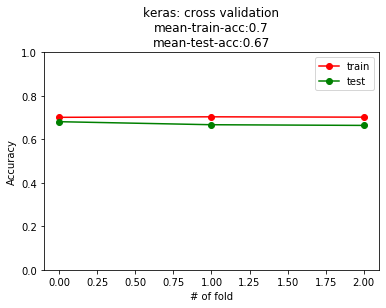

In [123]:
result = cross_validate(model, X, y, scoring='accuracy', cv=3, return_estimator=True, return_train_score= True)
    

plot_result('keras', result)

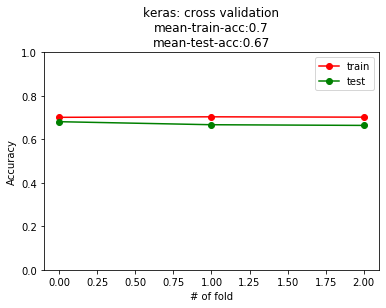

In [125]:
plot_result('keras', result)